In [1]:
import sys
sys.path.append("../2_train_models")

# TODO: update this to use eval on the test set at the last second

from utils import get_proj_dir
from file_configs import ValFilesConfig
from data_loading import extract_peaks
from performance_metrics import compute_performance_metrics

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import torch
from collections import defaultdict

In [2]:
cell_types = ["K562", "A673", "CACO2", "CALU3", "HUVEC", "MCF10A"]

timestamps = {"K562" : "2022-10-05_03-39-32",
              "A673" : "2022-11-01_05-16-07",
              "CACO2" : "2022-11-01_19-09-32",
              "CALU3" : "2022-11-01_19-09-51",
              "HUVEC" : "2022-11-01_05-16-51",
              "MCF10A" : "2022-11-01_05-04-08"}

model_type = "strand_merged_umap"
data_type = "procap"

In [3]:
def get_pseudorep_filepaths(val_config, pseudorep, pos_or_neg = "pos"):
    data_dir = os.path.dirname(val_config.train_val_peak_path)
    return os.path.join(data_dir, "pseudorep" + str(pseudorep) + "." + pos_or_neg + ".bigWig")

In [4]:
def load_all_data(cell_types, timestamps, model_type, data_type):
    true_profs = dict()
    true_counts = dict()
    pr1_profs = dict()
    pr2_profs = dict()
    log_pred_profs = dict()
    pred_logcounts = dict()
    
    for cell_type in cell_types:
        config = ValFilesConfig(cell_type, model_type, timestamps[cell_type], data_type)
        _, true_profiles = extract_peaks(config.genome_path,
                                         config.chrom_sizes,
                                         config.plus_bw_path,
                                         config.minus_bw_path,
                                         config.val_peak_path,
                                         in_window=config.in_window,
                                         out_window=config.out_window,
                                         max_jitter=0, verbose=True)
        true_profs[cell_type] = true_profiles
        true_counts[cell_type] = true_profiles.sum(axis=-1).squeeze()
        
        _, pr1_profiles = extract_peaks(config.genome_path,
                                        config.chrom_sizes,
                                        get_pseudorep_filepaths(config, 1, "pos"),
                                        get_pseudorep_filepaths(config, 1, "neg"),
                                        config.val_peak_path,
                                        in_window=config.in_window,
                                        out_window=config.out_window,
                                        max_jitter=0, verbose=True)
        
        pr1_profs[cell_type] = pr1_profiles
        
        _, pr2_profiles = extract_peaks(config.genome_path,
                                        config.chrom_sizes,
                                        get_pseudorep_filepaths(config, 2, "pos"),
                                        get_pseudorep_filepaths(config, 2, "neg"),
                                        config.val_peak_path,
                                        in_window=config.in_window,
                                        out_window=config.out_window,
                                        max_jitter=0, verbose=True)
        
        pr2_profs[cell_type] = pr2_profiles
        
        log_pred_profs[cell_type] = np.load(config.pred_profiles_val_path)
        pred_logcounts[cell_type] = np.load(config.pred_logcounts_val_path).squeeze()
        
    return true_profs, true_counts, pr1_profs, pr2_profs, log_pred_profs, pred_logcounts


true_profs, true_counts, pr1_profs, pr2_profs, log_pred_profs, pred_logcounts = load_all_data(cell_types,
                                                                                              timestamps,
                                                                                              model_type,
                                                                                              data_type)

Timestamp: 2022-10-05_03-39-32
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:08<00:00,  2.81it/s]
Loading Peaks: 3834it [00:05, 755.49it/s]

== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/K562/strand_merged_umap/2022-10-05_03-39-32_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 3834
Mask loaded? False


Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.06it/s]
Loading Peaks: 3834it [00:05, 710.18it/s]

== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/K562/strand_merged_umap/2022-10-05_03-39-32_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 3834
Mask loaded? False


Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.04it/s]
Loading Peaks: 3834it [00:05, 750.27it/s]


== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/K562/strand_merged_umap/2022-10-05_03-39-32_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 3834
Mask loaded? False
Timestamp: 2022-11-01_05-16-07
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.02it/s]
Loading Peaks: 5596it [00:07, 703.41it/s]

== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/A673/strand_merged_umap/2022-11-01_05-16-07_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 5596
Mask loaded? False


Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.06it/s]
Loading Peaks: 5596it [00:08, 662.38it/s]

== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/A673/strand_merged_umap/2022-11-01_05-16-07_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 5596
Mask loaded? False


Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.06it/s]
Loading Peaks: 5596it [00:07, 710.83it/s]


== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/A673/strand_merged_umap/2022-11-01_05-16-07_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 5596
Mask loaded? False
Timestamp: 2022-11-01_19-09-32
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.07it/s]
Loading Peaks: 5768it [00:08, 651.46it/s]


== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/CACO2/strand_merged_umap/2022-11-01_19-09-32_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 5768
Mask loaded? False
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.07it/s]
Loading Peaks: 5768it [00:07, 727.26it/s]

== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/CACO2/strand_merged_umap/2022-11-01_19-09-32_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 5768
Mask loaded? False


Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.10it/s]
Loading Peaks: 5768it [00:07, 725.22it/s]


== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/CACO2/strand_merged_umap/2022-11-01_19-09-32_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 5768
Mask loaded? False
Timestamp: 2022-11-01_19-09-51
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.05it/s]
Loading Peaks: 5553it [00:08, 676.84it/s]


== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/CALU3/strand_merged_umap/2022-11-01_19-09-51_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 5553
Mask loaded? False
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.06it/s]
Loading Peaks: 5553it [00:07, 706.85it/s]

== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/CALU3/strand_merged_umap/2022-11-01_19-09-51_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 5553
Mask loaded? False


Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.10it/s]
Loading Peaks: 5553it [00:07, 694.25it/s]

== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/CALU3/strand_merged_umap/2022-11-01_19-09-51_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 5553
Mask loaded? False


Timestamp: 2022-11-01_05-16-51
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.09it/s]
Loading Peaks: 3357it [00:05, 624.72it/s]

== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/HUVEC/strand_merged_umap/2022-11-01_05-16-51_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 3357
Mask loaded? False


Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.11it/s]
Loading Peaks: 3357it [00:05, 662.93it/s]

== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/HUVEC/strand_merged_umap/2022-11-01_05-16-51_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 3357
Mask loaded? False


Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.13it/s]
Loading Peaks: 3357it [00:05, 614.15it/s]


== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/HUVEC/strand_merged_umap/2022-11-01_05-16-51_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 3357
Mask loaded? False
Timestamp: 2022-11-01_05-04-08
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.00it/s]
Loading Peaks: 6258it [00:09, 689.76it/s]


== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/MCF10A/strand_merged_umap/2022-11-01_05-04-08_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 6258
Mask loaded? False
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.04it/s]
Loading Peaks: 6258it [00:09, 673.92it/s]


== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/MCF10A/strand_merged_umap/2022-11-01_05-04-08_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 6258
Mask loaded? False
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.11it/s]
Loading Peaks: 6258it [00:09, 675.98it/s]

== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/models/procap/MCF10A/strand_merged_umap/2022-11-01_05-04-08_in/peaks_uni_and_bi_val.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 6258
Mask loaded? False


In [6]:
plot_params = {"xtick.labelsize": 8,
               "ytick.labelsize": 8}
plt.rcParams.update(plot_params)

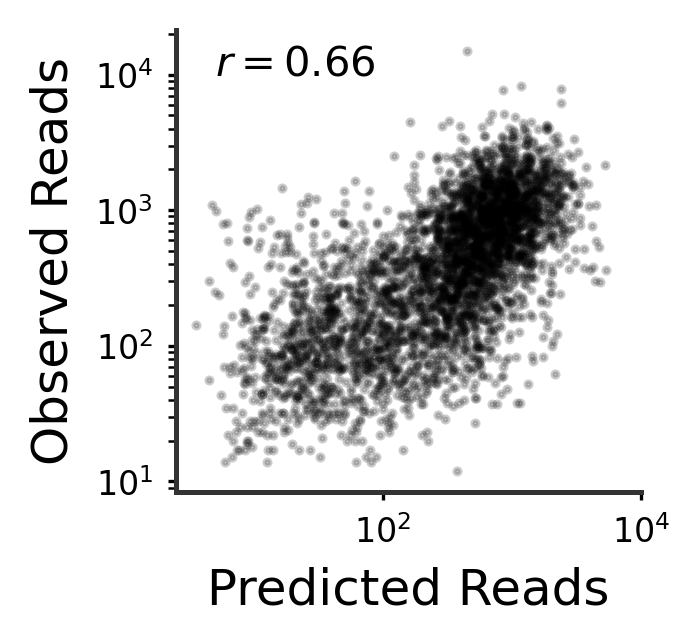

In [58]:
def plot_pred_vs_true_counts_one_cell_type(pred_logcounts, true_counts):
    
    plt.figure(figsize=(2, 2), dpi=300)
    
    # if the model preds/data are stranded, merge the two strands
    if len(pred_logcounts.shape) > 1:
        pred_logcounts = np.sum(pred_logcounts, axis=-1)
    if len(true_counts.shape) > 1:
        true_counts = np.sum(true_counts, axis=-1)
    assert pred_logcounts.shape == true_counts.shape

    plt.scatter(np.exp(pred_logcounts), true_counts,
                alpha = 0.2, s = 2, color="k")

    plt.semilogy()
    plt.semilogx()

    plt.ylabel("Observed Reads", fontsize=12)
    plt.xlabel("Predicted Reads", fontsize=12)
    plt.xticks([10**2, 10**4], fontsize=8)
    plt.yticks(fontsize=8)
    
    pearson_r = np.corrcoef(pred_logcounts,
                            np.log1p(true_counts))[0,1]
    plt.text(5, 10000, r'$r = %0.2f$' % pearson_r, fontsize=10)

    # aesthetics
    ax = plt.gca()
    ax.spines["left"].set_linewidth(1.2)
    ax.spines["bottom"].set_linewidth(1.2)
    ax.spines["left"].set_color("#333333")
    ax.spines["bottom"].set_color("#333333")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.tick_params("y", length=2)
    ax.tick_params("x", length=2)
        
    plt.show()
    

plot_pred_vs_true_counts_one_cell_type(pred_logcounts["K562"], true_counts["K562"])

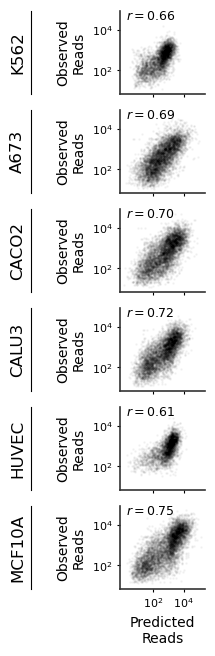

In [8]:
def add_extra_ylabel(axis, label, offset = -1.05):
    ax2 = axis.twinx()
    ax2.spines["left"].set_position(("axes", offset))
    ax2.spines["top"].set_visible(False)
    ax2.spines["right"].set_visible(False)
    ax2.spines["bottom"].set_visible(False)
    ax2.yaxis.set_label_position('left')
    ax2.yaxis.set_ticks_position('none')
    ax2.set_yticklabels([])
    ax2.set_ylabel(label, fontsize = 12)
        

def plot_pred_vs_true_counts_all_cells(all_pred_logcounts,
                                       all_true_counts, cell_types):
    
    fig, axes = plt.subplots(len(cell_types), 1,
                             figsize=(1.1, 7.5),
                             sharex=True, sharey=True)

    for ax, cell_type in zip(axes, cell_types):
        pred_logcounts = all_pred_logcounts[cell_type]
        true_counts = all_true_counts[cell_type]
    
        # if the model preds/data are stranded, merge the two strands
        if len(pred_logcounts.shape) > 1:
            pred_logcounts = np.sum(pred_logcounts, axis=-1)
        if len(true_counts.shape) > 1:
            true_counts = np.sum(true_counts, axis=-1)
        assert pred_logcounts.shape == true_counts.shape

        ax.scatter(np.exp(pred_logcounts), true_counts,
                    alpha = 0.03, s = 1, color="k")

        ax.semilogy()
        ax.semilogx()

        ax.set_ylabel("Observed\nReads", fontsize=10)
        add_extra_ylabel(ax, cell_type, offset = -1.05)
        
        if cell_type == cell_types[-1]:
            ax.set_xlabel("Predicted\nReads", fontsize=10)

        pearson_r = np.corrcoef(pred_logcounts,
                                np.log1p(true_counts))[0,1]
        ax.text(2, 30000, r'$r = %0.2f$' % pearson_r, fontsize=9)

        # aesthetics
        ax.spines["left"].set_linewidth(1.2)
        ax.spines["bottom"].set_linewidth(1.2)
        ax.spines["left"].set_color("#333333")
        ax.spines["bottom"].set_color("#333333")
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.tick_params("y", length=2)
        ax.tick_params("x", length=2)
        
    ax.set_xticks([10**2, 10**4])
        
    plt.show()
    

plot_pred_vs_true_counts_all_cells(pred_logcounts, true_counts, cell_types)

In [9]:
def get_replicate_val_metrics(all_rep1_profs, all_rep2_profs, cell_types):
    rep_val_metrics = dict()
    for cell_type in cell_types:
        rep1_profs = all_rep1_profs[cell_type]
        rep2_profs = all_rep2_profs[cell_type]
        
        # need to make one of the replicates look like model predictions
        # (normalize to sum to 1, then take the log)
        # (need to add pseudocount to avoid log of 0 error)
        log_rep2_profs = np.log((rep2_profs + 1e-2) / (rep2_profs + 1e-2).sum(axis=(-1,-2), keepdims=True))
        
        metrics = compute_performance_metrics(rep1_profs.swapaxes(1,2)[:, None, :, :],
                                              log_rep2_profs.swapaxes(1,2)[:, None, :, :],
                                              rep1_profs.sum(axis=-1)[:, None, :],
                                              np.log1p(rep2_profs.sum(axis=-1))[:, None, :],
                                              smooth_true_profs=False,
                                              smooth_pred_profs=False)
        rep_val_metrics[cell_type] = metrics
    return rep_val_metrics

rep_val_metrics = get_replicate_val_metrics(pr1_profs, pr2_profs, cell_types)

/mnt/lab_data2/kcochran/new_procap_models/src/figure_notebooks/../2_train_models/performance_metrics.py:52: RuntimeWarning: invalid value encountered in true_divide
  cross_ent = (-log_prob_pows_sum) / trials


In [10]:
def get_nonsmooth_val_metrics(all_true_profs, all_log_pred_profs,
                              all_true_counts, all_pred_logcounts, cell_types):
    val_metrics = dict()
    for cell_type in cell_types:
        true_profs = all_true_profs[cell_type]
        log_pred_profs = all_log_pred_profs[cell_type]
        true_counts = all_true_counts[cell_type]
        pred_logcounts = all_pred_logcounts[cell_type]
        
        metrics = compute_performance_metrics(true_profs.swapaxes(1,2)[:, None, :, :],
                                              log_pred_profs.swapaxes(1,2)[:, None, :, :],
                                              true_counts[:, None, :],
                                              np.concatenate((pred_logcounts[:, None, None],
                                                              pred_logcounts[:, None, None]), axis=-1),
                                              smooth_true_profs=False,
                                              smooth_pred_profs=False)
        val_metrics[cell_type] = metrics
    return val_metrics

val_metrics = get_nonsmooth_val_metrics(true_profs, log_pred_profs,
                                        true_counts, pred_logcounts, cell_types)

In [11]:
def get_random_baseline_val_metrics(all_true_profs, all_true_counts, cell_types):
    val_metrics = dict()
    for cell_type in cell_types:
        true_profs = all_true_profs[cell_type]
        true_counts = all_true_counts[cell_type]
        
        rand_pred_profs = np.ones_like(true_profs)
        # assuming strand-merged
        assert "strand_merged" in model_type
        rand_log_pred_profs = np.log(rand_pred_profs / np.sum(rand_pred_profs, axis=(-1,-2), keepdims=True))
        rand_pred_logcounts = np.ones_like(true_counts)
        
        metrics = compute_performance_metrics(true_profs.swapaxes(1,2)[:, None, :, :],
                                              rand_log_pred_profs.swapaxes(1,2)[:, None, :, :],
                                              true_counts[:, None, :],
                                              rand_pred_logcounts[:, None, :],
                                              smooth_true_profs=False,
                                              smooth_pred_profs=False)
        val_metrics[cell_type] = metrics
    return val_metrics

rand_val_metrics = get_random_baseline_val_metrics(true_profs, true_counts, cell_types)

In [12]:
# colormap code from https://towardsdatascience.com/beautiful-custom-colormaps-with-matplotlib-5bab3d1f0e72
# (credits to Kerry Halupka)

from matplotlib import colors as mplcolors

def get_continuous_cmap(hex_list, float_list=None):
    def hex_to_rgb(value):
        '''
        Converts hex to rgb colours
        value: string of 6 characters representing a hex colour.
        Returns: list length 3 of RGB values'''
        value = value.strip("#") # removes hash symbol if present
        lv = len(value)
        return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


    def rgb_to_dec(value):
        '''
        Converts rgb to decimal colours (i.e. divides each value by 256)
        value: list (length 3) of RGB values
        Returns: list (length 3) of decimal values'''
        return [v/256 for v in value]
    
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        cdict[col] = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]

    return mplcolors.LinearSegmentedColormap('cmp', segmentdata=cdict, N=256)

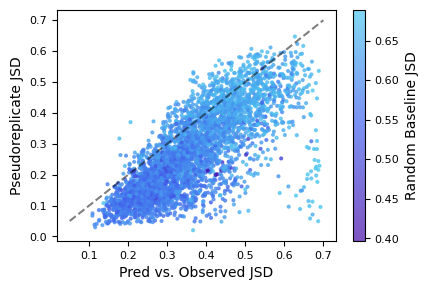

In [13]:
plt.figure(figsize=(4.5,3))
plt.scatter(val_metrics["K562"]["jsd"], rep_val_metrics["K562"]["jsd"], alpha=0.7, s=4,
            c = rand_val_metrics["K562"]["jsd"],
            cmap = get_continuous_cmap(["#480CA8", "#4361EE", "#4CC9F0"]))

plt.plot([0.05,0.7],[0.05,0.7], color="k", alpha=0.5, linestyle="dashed")
plt.xlabel("Pred vs. Observed JSD")
plt.ylabel("Pseudoreplicate JSD")
plt.colorbar(label="Random Baseline JSD")
plt.show()

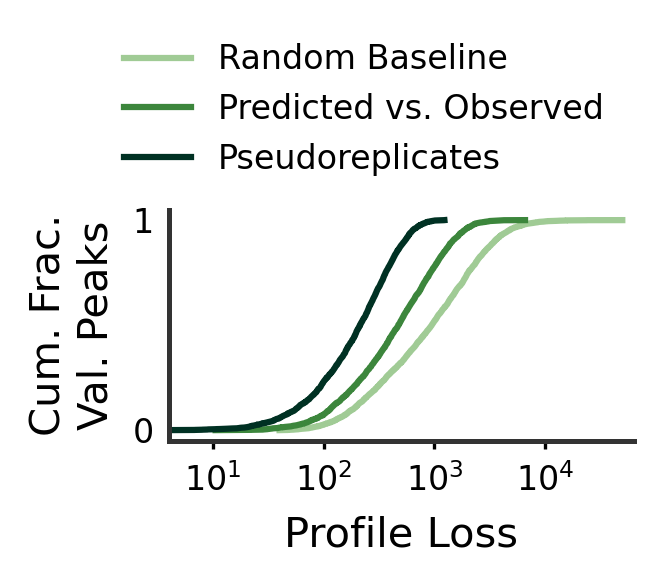

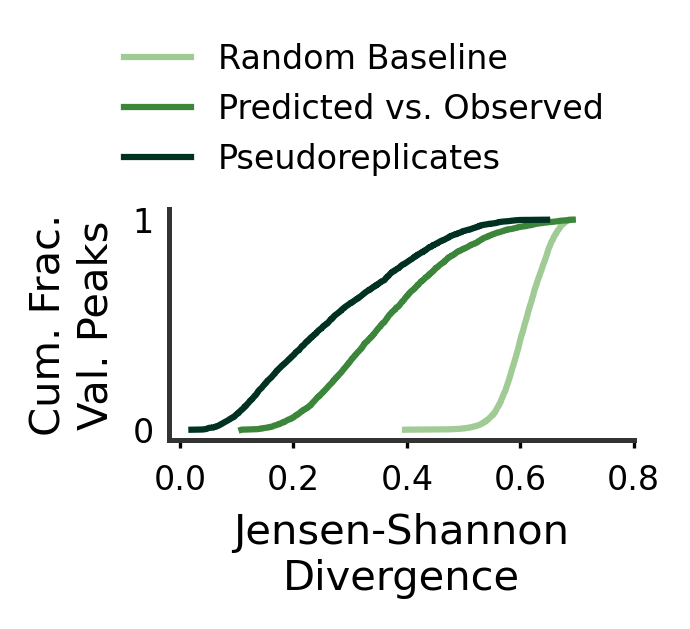

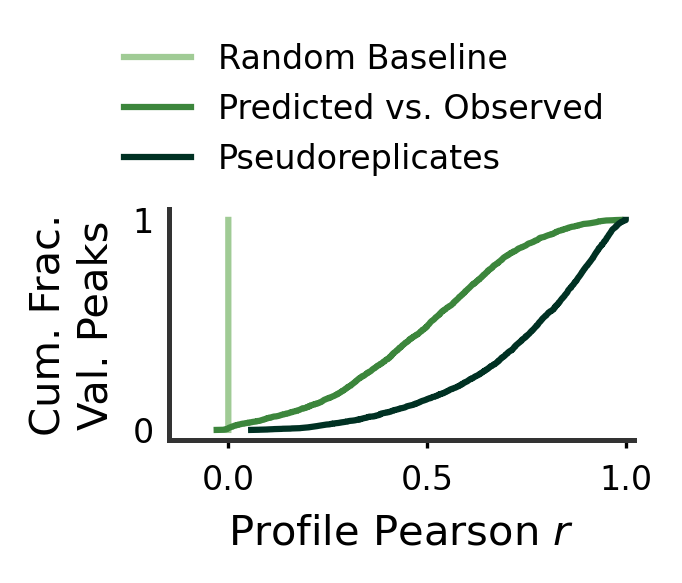

In [122]:
def plot_prof_performance_cdf(val_metrics, rep_val_metrics, rand_val_metrics, cell_type,
                              metric = "nll"):
    
    metric_names = {"nll" : "Profile Loss",
                    "jsd" : "Jensen-Shannon\nDivergence",
                    "profile_pearson" : r'Profile Pearson $r$'}

    fig = plt.figure(figsize=(2,1), dpi=300)
    
    ax = plt.gca()
    pred_vs_obs = val_metrics[cell_type][metric].squeeze()
    rep_baseline = rep_val_metrics[cell_type][metric].squeeze()
    rand_baseline = rand_val_metrics[cell_type][metric].squeeze()

    if metric in ["nll"]:
        pred_vs_obs = np.log10(pred_vs_obs + 1e-5)
        rep_baseline = np.log10(rep_baseline + 1e-5)
        rand_baseline = np.log10(rand_baseline + 1e-5)

    pred_vs_obs = np.sort(pred_vs_obs)
    rep_baseline = np.sort(rep_baseline)
    rand_baseline = np.sort(rand_baseline)
    cdf = np.array(range(len(pred_vs_obs)))/float(len(pred_vs_obs))

    ax.plot(rand_baseline, cdf, color="#A0CB95", alpha=1, label="Random Baseline")
    ax.plot(pred_vs_obs, cdf, color="#3C863C", alpha=1, label="Predicted vs. Observed")
    ax.plot(rep_baseline, cdf, color="#003123", alpha=1, label="Pseudoreplicates")

    if metric in ["nll"]:
        x_ticks = range(1, 5)
        ax.set_xticks(ticks=x_ticks,
                      labels=[r'$10^{' + str(i) + r'}$' for i in x_ticks],
                      fontsize=8)
    else:
        ax.set_xticks(ax.get_xticks(), fontsize=8)
    if metric in ["jsd"]:
        ax.set_xlim(-0.02, ax.get_xlim()[1])
    if metric in ["profile_pearson"]:
        ax.set_xlim(-0.15, 1.02)
    if metric in ["nll"]:
        ax.set_xlim(0.6, 4.8)

    ax.set_xlabel(metric_names[metric], fontsize = 10)
    ax.legend(fontsize=8, frameon=False, bbox_to_anchor=(1,1.85))

    ax.set_yticks([0, 1], fontsize=8)
    ax.set_ylabel("Cum. Frac.\nVal. Peaks", fontsize = 10)

    ax.spines["left"].set_linewidth(1.2)
    ax.spines["bottom"].set_linewidth(1.2)
    ax.spines["left"].set_color("#333333")
    ax.spines["bottom"].set_color("#333333")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.yaxis.set_ticks_position('none')
    ax.tick_params("y", length=0)
    ax.tick_params("x", length=2)

    plt.show()

plot_prof_performance_cdf(val_metrics, rep_val_metrics, rand_val_metrics, "K562", "nll")
plot_prof_performance_cdf(val_metrics, rep_val_metrics, rand_val_metrics, "K562", "jsd")
plot_prof_performance_cdf(val_metrics, rep_val_metrics, rand_val_metrics, "K562", "profile_pearson")

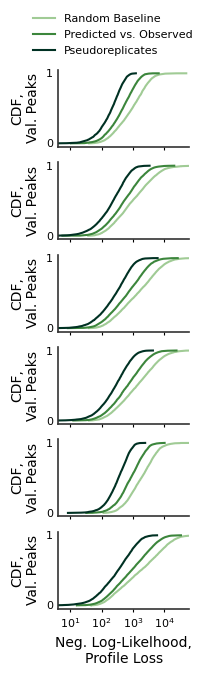

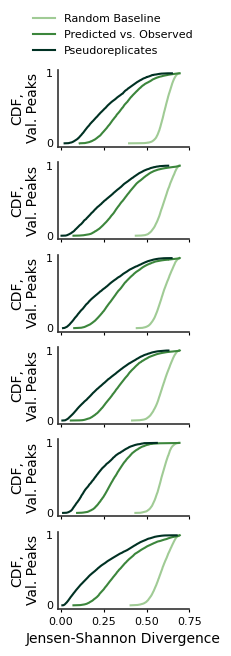

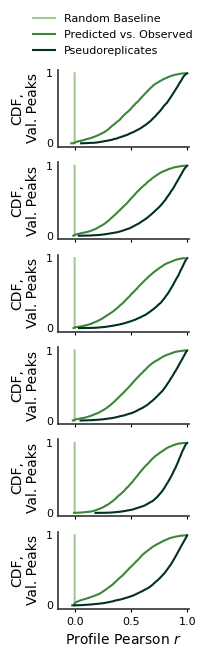

In [15]:
def plot_prof_performance_cdf_all_cells(val_metrics, rep_val_metrics, rand_val_metrics,
                                    metric = "nll", cell_types = cell_types):
    
    metric_names = {"nll" : "Neg. Log-Likelhood,\nProfile Loss",
                    "jsd" : "Jensen-Shannon Divergence",
                    "profile_pearson" : r'Profile Pearson $r$'}

    fig, axes = plt.subplots(len(cell_types), 1, figsize=(1.7,7), sharex = True)
    
    for ax, cell_type in zip(axes, cell_types):
        pred_vs_obs = val_metrics[cell_type][metric].squeeze()
        rep_baseline = rep_val_metrics[cell_type][metric].squeeze()
        rand_baseline = rand_val_metrics[cell_type][metric].squeeze()
    
        if metric in ["nll"]:
            pred_vs_obs = np.log10(pred_vs_obs + 1e-5)
            rep_baseline = np.log10(rep_baseline + 1e-5)
            rand_baseline = np.log10(rand_baseline + 1e-5)
          
        pred_vs_obs = np.sort(pred_vs_obs)
        rep_baseline = np.sort(rep_baseline)
        rand_baseline = np.sort(rand_baseline)
        cdf = np.array(range(len(pred_vs_obs)))/float(len(pred_vs_obs))

        ax.plot(rand_baseline, cdf, color="#A0CB95", alpha=1, label="Random Baseline")
        ax.plot(pred_vs_obs, cdf, color="#3C863C", alpha=1, label="Predicted vs. Observed")
        ax.plot(rep_baseline, cdf, color="#003123", alpha=1, label="Pseudoreplicates")
        
        if metric in ["nll"]:
            x_ticks = range(1, 5)
            ax.set_xticks(ticks=x_ticks,
                          labels=[r'$10^{' + str(i) + r'}$' for i in x_ticks],
                          fontsize=8)
        else:
            ax.set_xticks(ax.get_xticks(), fontsize=8)
        if metric in ["jsd"]:
            ax.set_xlim(-0.02, ax.get_xlim()[1])
        if metric in ["profile_pearson"]:
            ax.set_xlim(-0.15, 1.02)
        if metric in ["nll"]:
            ax.set_xlim(0.6, 4.8)
            
        if cell_type == cell_types[-1]:
            ax.set_xlabel(metric_names[metric], fontsize = 10)
        
        if cell_type == cell_types[0]:
            ax.legend(fontsize=8, frameon=False, bbox_to_anchor=(1.1,1.85))
        
        ax.set_yticks([0, 1], fontsize=8)
        ax.set_ylabel("CDF,\nVal. Peaks", fontsize = 10)
        
        ax.spines["left"].set_linewidth(1.2)
        ax.spines["bottom"].set_linewidth(1.2)
        ax.spines["left"].set_color("#333333")
        ax.spines["bottom"].set_color("#333333")
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.yaxis.set_ticks_position('none')
        ax.tick_params("y", length=0)
        ax.tick_params("x", length=2)

    plt.show()

plot_prof_performance_cdf_all_cells(val_metrics, rep_val_metrics, rand_val_metrics, "nll")
plot_prof_performance_cdf_all_cells(val_metrics, rep_val_metrics, rand_val_metrics, "jsd")
plot_prof_performance_cdf_all_cells(val_metrics, rep_val_metrics, rand_val_metrics, "profile_pearson")

In [16]:
def get_norm_val_metrics_all_cells(val_metrics, rep_val_metrics, rand_val_metrics,
                                   metrics = ["nll", "jsd", "profile_pearson"],
                                   cell_types = cell_types):
    
    norm_val_metrics = defaultdict(lambda : dict())
    
    for cell_type in cell_types:
        for metric in metrics:
            pred_vs_obs = val_metrics[cell_type][metric]
            rep_baseline = rep_val_metrics[cell_type][metric]
            rand_baseline = rand_val_metrics[cell_type][metric]
          
            norm_metrics = (pred_vs_obs - rand_baseline) / (rep_baseline - rand_baseline)
            norm_metrics = np.clip(norm_metrics, 0, 1)
            norm_val_metrics[cell_type][metric] = norm_metrics

    return norm_val_metrics

norm_val_metrics = get_norm_val_metrics_all_cells(val_metrics, rep_val_metrics, rand_val_metrics)

K562


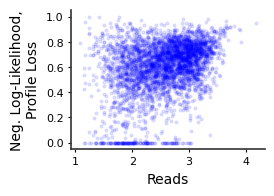

A673


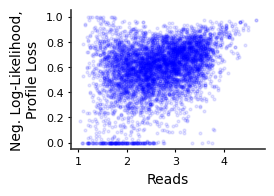

CACO2


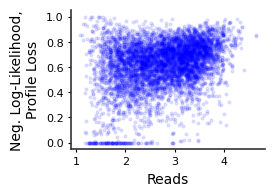

CALU3


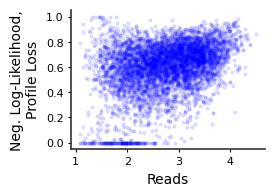

HUVEC


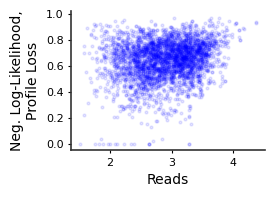

MCF10A


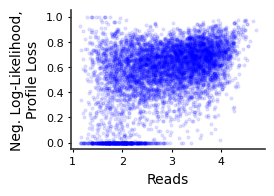

K562


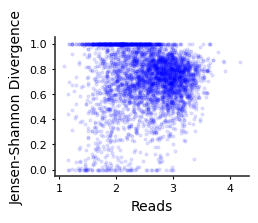

A673


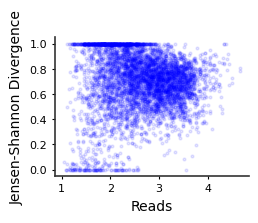

CACO2


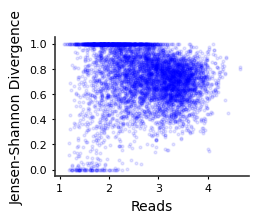

CALU3


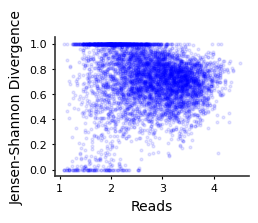

HUVEC


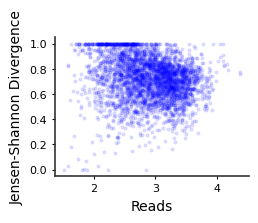

MCF10A


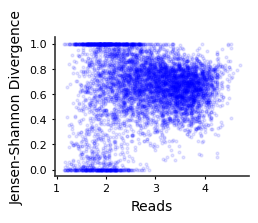

K562


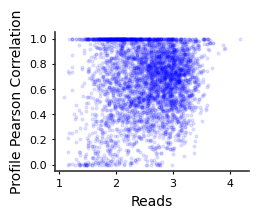

A673


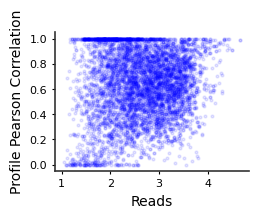

CACO2


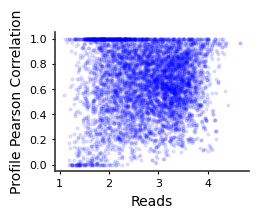

CALU3


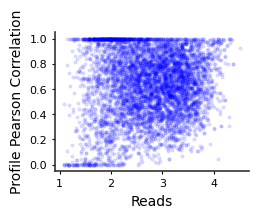

HUVEC


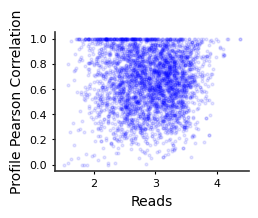

MCF10A


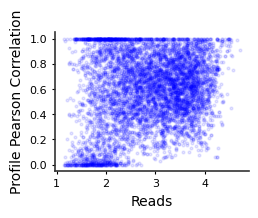

In [17]:
def norm_metrics_by_counts(val_metrics, true_counts, cell_types, metric = "nll"):
    metric_names = {"nll" : "Neg. Log-Likelihood,\nProfile Loss",
                    "jsd" : "Jensen-Shannon Divergence",
                    "profile_pearson" : "Profile Pearson Correlation"}

    for cell_type in cell_types:
        print(cell_type)
        data = val_metrics[cell_type][metric]
        
        plt.figure(figsize=(2.5, 1.8))

        plt.scatter(np.log10(true_counts[cell_type].sum(axis=-1)),
                    data,
                    s = 4, alpha=0.1, color="blue")
        
        ax = plt.gca()
        ax.spines["left"].set_linewidth(1.2)
        ax.spines["bottom"].set_linewidth(1.2)
        ax.spines["left"].set_color("#333333")
        ax.spines["bottom"].set_color("#333333")
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.tick_params(length=2)
            
        plt.yticks(fontsize=8)
        
        plt.ylabel(metric_names[metric], fontsize=10)
        
        plt.xticks(fontsize=8)
        plt.xlabel("Reads", fontsize=10)
        
        plt.show()
        
norm_metrics_by_counts(norm_val_metrics, true_counts, cell_types, "nll")
norm_metrics_by_counts(norm_val_metrics, true_counts, cell_types, "jsd")
norm_metrics_by_counts(norm_val_metrics, true_counts, cell_types, "profile_pearson")

In [18]:
def get_orientation_indexes(profiles):
    return np.max(profiles.sum(axis=-1), axis=-1) / np.sum(profiles, axis=(-1,-2))

In [19]:
def inverse_hist(profile):
    assert len(profile.shape) == 1 or (len(profile.shape) == 2 and profile.shape[0] == 2), profile.shape

    profile = profile.sum(axis=0).astype(int)
    return np.repeat(range(len(profile)), profile)

In [20]:
def get_variances(profiles):
    return np.array([np.var(inverse_hist(profile)) for profile in profiles])

K562


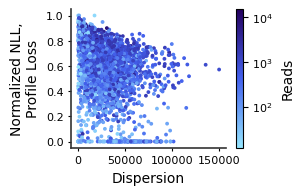

A673


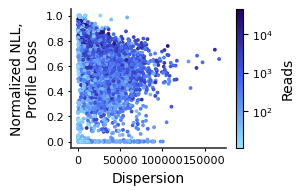

CACO2


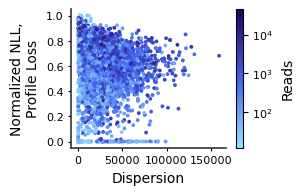

CALU3


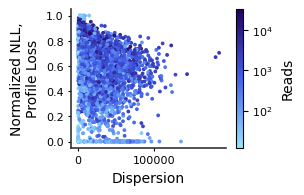

HUVEC


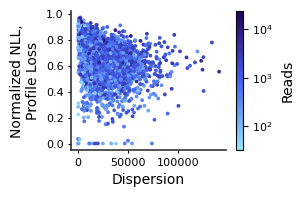

MCF10A


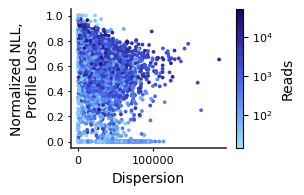

K562


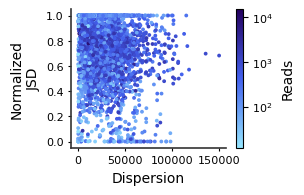

A673


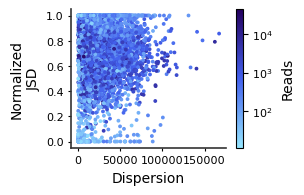

CACO2


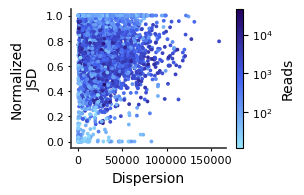

CALU3


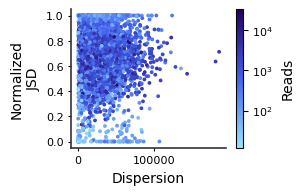

HUVEC


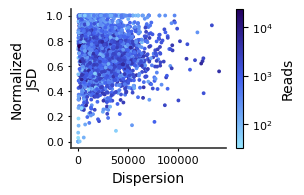

MCF10A


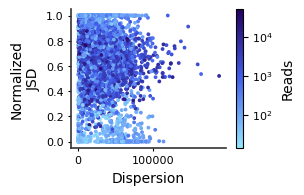

K562


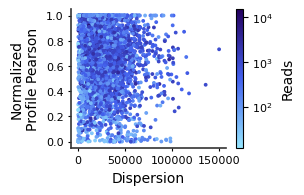

A673


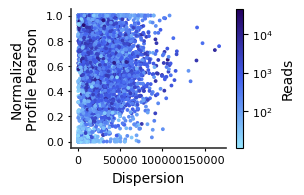

CACO2


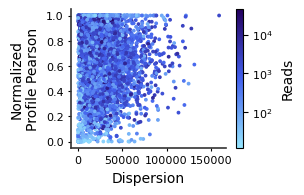

CALU3


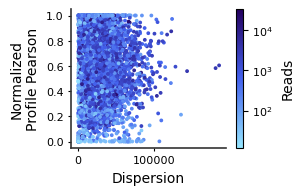

HUVEC


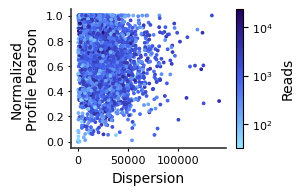

MCF10A


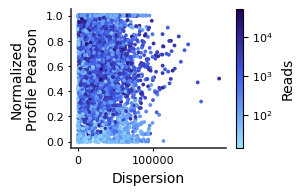

In [21]:
def metrics_by_variances_and_counts(val_metrics, true_profs, true_counts, cell_types, metric = "nll"):
    metric_names = {"nll" : "Normalized NLL,\nProfile Loss",
                    "jsd" : "Normalized\nJSD",
                    "profile_pearson" : "Normalized\nProfile Pearson"}

    for cell_type in cell_types:
        print(cell_type)
        data = val_metrics[cell_type][metric]
        
        plt.figure(figsize=(2.5, 1.8))

        cmap = get_continuous_cmap(["#96E6FF", "#4361EE", "#25005F"])
        plt.scatter(get_variances(true_profs[cell_type]),
                    data,
                    c = np.log10(true_counts[cell_type].sum(axis=-1)),
                    s = 3, alpha=1, cmap=cmap)
        
        ax = plt.gca()
        ax.spines["left"].set_linewidth(1.2)
        ax.spines["bottom"].set_linewidth(1.2)
        ax.spines["left"].set_color("#333333")
        ax.spines["bottom"].set_color("#333333")
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.tick_params(length=2)
            
        plt.yticks(fontsize=8)
        
        plt.ylabel(metric_names[metric], fontsize=10)
        
        plt.xticks(fontsize=8)
        plt.xlabel("Dispersion", fontsize=10)
        
        cb = plt.colorbar(pad=0.05)
        cb.ax.tick_params(labelsize=8)
        cb.ax.set_yticks(range(2,5))
        cb.ax.set_yticklabels([r'$10^' + str(i) + r'$' for i in cb.ax.get_yticks()])
        cb.set_label(label="Reads", fontsize=10, labelpad=5)
        
        plt.show()
        
metrics_by_variances_and_counts(norm_val_metrics, true_profs, true_counts, cell_types, "nll")
metrics_by_variances_and_counts(norm_val_metrics, true_profs, true_counts, cell_types, "jsd")
metrics_by_variances_and_counts(norm_val_metrics, true_profs, true_counts, cell_types, "profile_pearson")

K562


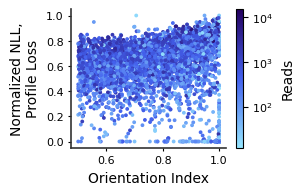

A673


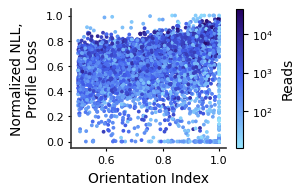

CACO2


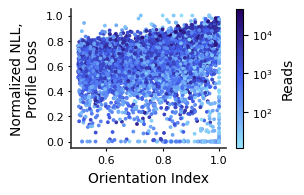

CALU3


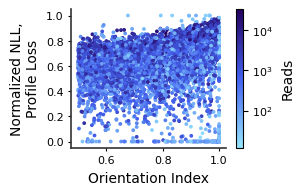

HUVEC


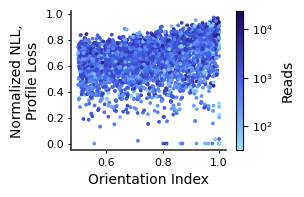

MCF10A


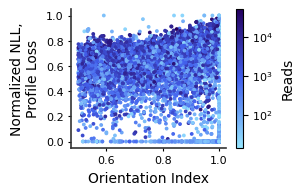

K562


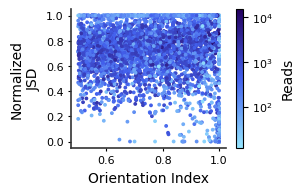

A673


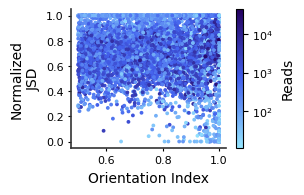

CACO2


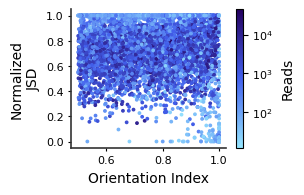

CALU3


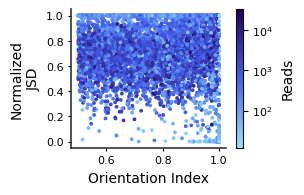

HUVEC


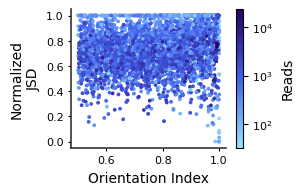

MCF10A


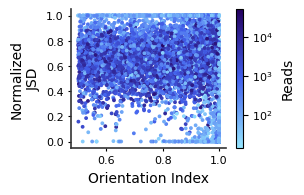

K562


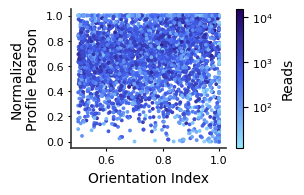

A673


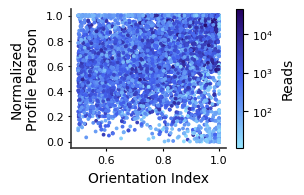

CACO2


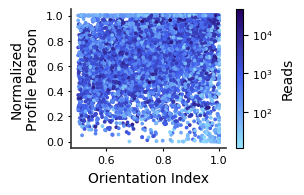

CALU3


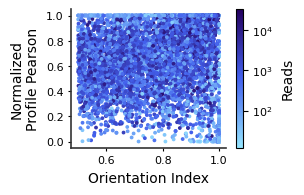

HUVEC


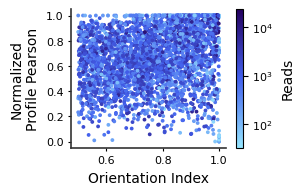

MCF10A


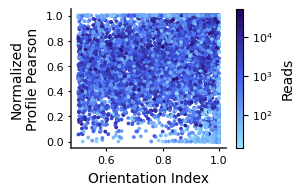

In [22]:
def metrics_by_orientation_index_and_counts(val_metrics, true_profs, true_counts, cell_types, metric = "nll"):
    metric_names = {"nll" : "Normalized NLL,\nProfile Loss",
                    "jsd" : "Normalized\nJSD",
                    "profile_pearson" : "Normalized\nProfile Pearson"}

    for cell_type in cell_types:
        print(cell_type)
        data = val_metrics[cell_type][metric]
        
        plt.figure(figsize=(2.5, 1.8))

        cmap = get_continuous_cmap(["#96E6FF", "#4361EE", "#25005F"])
        plt.scatter(get_orientation_indexes(true_profs[cell_type]),
                    data,
                    c = np.log10(true_counts[cell_type].sum(axis=-1)),
                    s = 3, alpha=1, cmap=cmap)
        
        ax = plt.gca()
        ax.spines["left"].set_linewidth(1.2)
        ax.spines["bottom"].set_linewidth(1.2)
        ax.spines["left"].set_color("#333333")
        ax.spines["bottom"].set_color("#333333")
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.tick_params(length=2)
            
        plt.yticks(fontsize=8)
        
        plt.ylabel(metric_names[metric], fontsize=10)
        
        plt.xticks(fontsize=8)
        plt.xlabel("Orientation Index", fontsize=10)
        
        cb = plt.colorbar(pad=0.05)
        cb.ax.tick_params(labelsize=8)
        cb.ax.set_yticks(range(2,5))
        cb.ax.set_yticklabels([r'$10^' + str(i) + r'$' for i in cb.ax.get_yticks()])
        cb.set_label(label="Reads", fontsize=10, labelpad=5)
        
        plt.show()
        
metrics_by_orientation_index_and_counts(norm_val_metrics, true_profs, true_counts, cell_types, "nll")
metrics_by_orientation_index_and_counts(norm_val_metrics, true_profs, true_counts, cell_types, "jsd")
metrics_by_orientation_index_and_counts(norm_val_metrics, true_profs, true_counts, cell_types, "profile_pearson")

K562


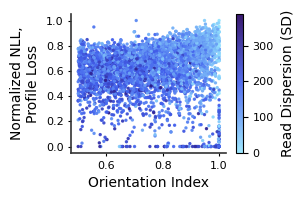

A673


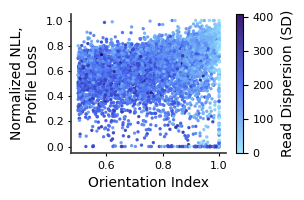

CACO2


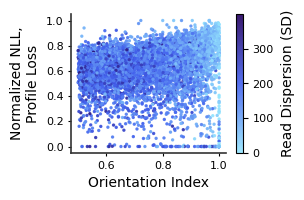

CALU3


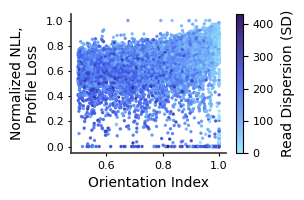

HUVEC


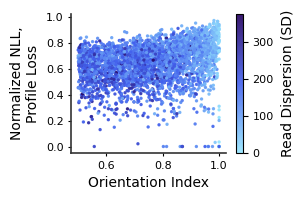

MCF10A


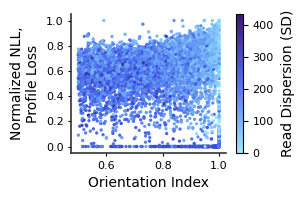

K562


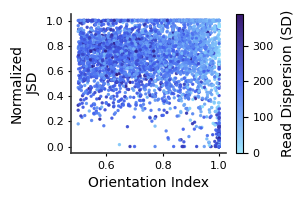

A673


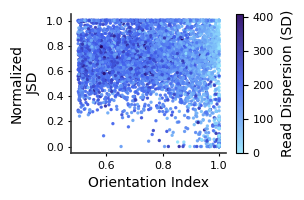

CACO2


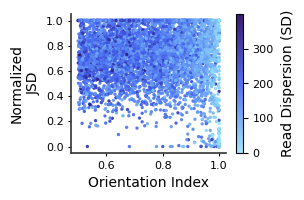

CALU3


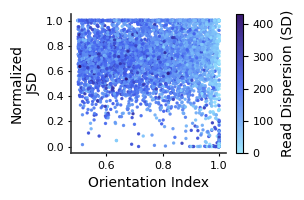

HUVEC


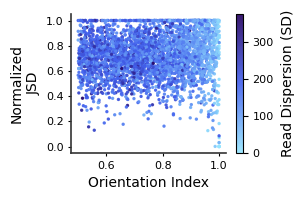

MCF10A


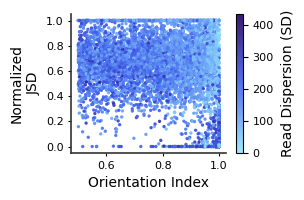

K562


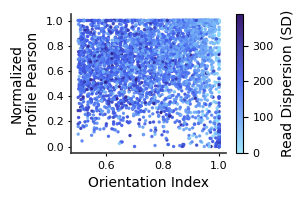

A673


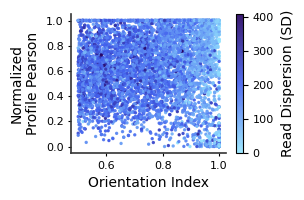

CACO2


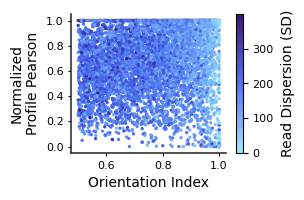

CALU3


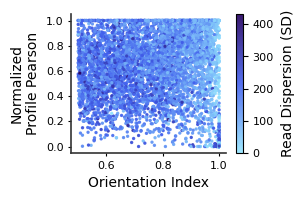

HUVEC


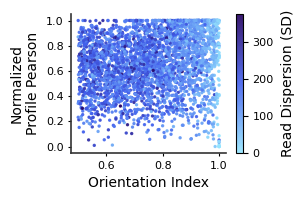

MCF10A


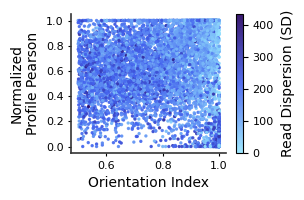

In [23]:
def metrics_by_orientation_index_and_variance(val_metrics, true_profs, true_counts, cell_types, metric = "nll"):
    metric_names = {"nll" : "Normalized NLL,\nProfile Loss",
                    "jsd" : "Normalized\nJSD",
                    "profile_pearson" : "Normalized\nProfile Pearson"}

    for cell_type in cell_types:
        print(cell_type)
        data = val_metrics[cell_type][metric]
        
        plt.figure(figsize=(2.5, 1.8))

        cmap = get_continuous_cmap(["#96E6FF", "#4361EE", "#25005F"])
        plt.scatter(get_orientation_indexes(true_profs[cell_type]),
                    data,
                    c = get_variances(true_profs[cell_type]) ** 0.5,
                    s = 2, alpha=0.9, cmap=cmap)
        
        ax = plt.gca()
        ax.spines["left"].set_linewidth(1.2)
        ax.spines["bottom"].set_linewidth(1.2)
        ax.spines["left"].set_color("#333333")
        ax.spines["bottom"].set_color("#333333")
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.tick_params(length=2)
            
        plt.yticks(fontsize=8)
        
        plt.ylabel(metric_names[metric], fontsize=10)
        
        plt.xticks(fontsize=8)
        plt.xlabel("Orientation Index", fontsize=10)
        
        cb = plt.colorbar(pad=0.05)
        cb.ax.tick_params(labelsize=8)
        #cb.ax.set_yticks(range(2,5))
        #cb.ax.set_yticklabels([r'$10^' + str(i) + r'$' for i in cb.ax.get_yticks()])
        cb.set_label(label="Read Dispersion (SD)", fontsize=10, labelpad=5)
        
        plt.show()
        
metrics_by_orientation_index_and_variance(norm_val_metrics, true_profs, true_counts, cell_types, "nll")
metrics_by_orientation_index_and_variance(norm_val_metrics, true_profs, true_counts, cell_types, "jsd")
metrics_by_orientation_index_and_variance(norm_val_metrics, true_profs, true_counts, cell_types, "profile_pearson")

In [24]:
os.environ["CUDA_VISIBLE_DEVICES"] = "MIG-40f43250-998e-586a-ac37-d6520e92590f"

union_peaks_path = get_proj_dir() + "data/" + data_type + "/processed/union_val_peaks_across_cell_types.bed.gz"


def _predict(model, onehot_seqs, batch_size=64, logits = False):
    with torch.no_grad():
        starts = np.arange(0, onehot_seqs.shape[0], batch_size)
        ends = starts + batch_size

        y_profiles, y_counts = [], []
        for start, end in zip(starts, ends):
            X_batch = onehot_seqs[start:end].cuda()

            y_profiles_, y_counts_ = model(X_batch)
            if not logits:  # apply softmax
                y_profiles_ = model.log_softmax(y_profiles_)
            y_profiles.append(y_profiles_.cpu().detach().numpy())
            y_counts.append(y_counts_.cpu().detach().numpy())

        y_profiles = np.concatenate(y_profiles)
        y_counts = np.concatenate(y_counts)
        return y_profiles, y_counts

    
def predict_union_peaks_all_cells(cell_types, timestamps, model_type, data_type):
    pred_logcounts = dict()
    true_counts = dict()
    for cell_type in cell_types:
        print(cell_type)
        config = ValFilesConfig(cell_type, model_type, timestamps[cell_type], data_type)
        model = torch.load(config.model_save_path).cuda()
        
        onehot_seqs, true_profs = extract_peaks(config.genome_path,
                                       config.chrom_sizes,
                                       config.plus_bw_path,
                                       config.minus_bw_path,
                                       union_peaks_path,
                                       in_window=config.in_window,
                                       out_window=config.out_window,
                                       max_jitter=0, verbose=True)

        _, pred_logcts = _predict(model, torch.tensor(onehot_seqs, dtype=torch.float))
        pred_logcounts[cell_type] = pred_logcts
        true_counts[cell_type] = true_profs.sum(axis=-1)
    return pred_logcounts, true_counts


union_pred_logcounts, union_true_counts = predict_union_peaks_all_cells(cell_types, timestamps,
                                                     model_type, data_type)

K562
Timestamp: 2022-10-05_03-39-32
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:08<00:00,  2.99it/s]
Loading Peaks: 11335it [00:15, 722.58it/s]


== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/data/procap/processed/union_val_peaks_across_cell_types.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 11335
Mask loaded? False
A673
Timestamp: 2022-11-01_05-16-07
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.02it/s]
Loading Peaks: 11335it [00:15, 733.94it/s]


== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/data/procap/processed/union_val_peaks_across_cell_types.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 11335
Mask loaded? False
CACO2
Timestamp: 2022-11-01_19-09-32
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.03it/s]
Loading Peaks: 11335it [00:16, 698.36it/s]


== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/data/procap/processed/union_val_peaks_across_cell_types.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 11335
Mask loaded? False
CALU3
Timestamp: 2022-11-01_19-09-51
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:08<00:00,  2.98it/s]
Loading Peaks: 11335it [00:16, 697.62it/s]

== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/data/procap/processed/union_val_peaks_across_cell_types.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 11335
Mask loaded? False


HUVEC
Timestamp: 2022-11-01_05-16-51
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:08<00:00,  3.00it/s]
Loading Peaks: 11335it [00:16, 687.05it/s]


== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/data/procap/processed/union_val_peaks_across_cell_types.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 11335
Mask loaded? False
MCF10A
Timestamp: 2022-11-01_05-04-08
Loading genome sequence from /mnt/lab_data2/kcochran/new_procap_models/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:08<00:00,  2.97it/s]
Loading Peaks: 11335it [00:17, 666.33it/s]


== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/new_procap_models/data/procap/processed/union_val_peaks_across_cell_types.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 11335
Mask loaded? False


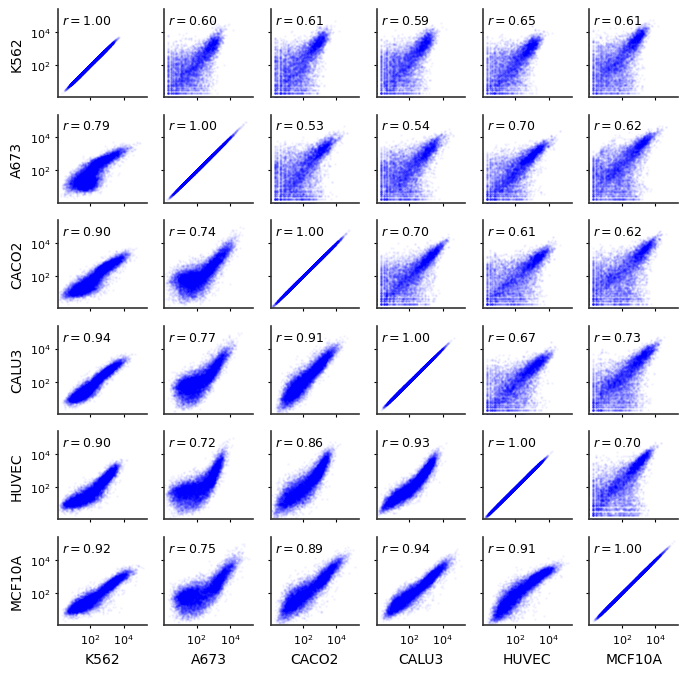

In [23]:
def plot_counts_across_cell_types(all_pred_counts, all_true_counts, cell_types):

    plot_params = {"xtick.labelsize": 8,
                   "ytick.labelsize": 8}
    plt.rcParams.update(plot_params)
    
    
    fig, axes = plt.subplots(len(cell_types), len(cell_types),
                             figsize=(8, 8), sharex=True, sharey=True)
    
    for i, (ax_row, cell_1) in enumerate(zip(axes, cell_types)):
        pred_counts1 = all_pred_counts[cell_1]
        true_counts1 = all_true_counts[cell_1].sum(axis=-1)  # not stranded
        for j, (ax, cell_2) in enumerate(zip(ax_row, cell_types)):
            pred_counts2 = all_pred_counts[cell_2]
            true_counts2 = all_true_counts[cell_2].sum(axis=-1)  # not stranded

            pred_counts1 = pred_counts1.squeeze().flatten()
            pred_counts2 = pred_counts2.squeeze().flatten()
            
            true_counts1 = true_counts1.squeeze().flatten()
            true_counts2 = true_counts2.squeeze().flatten()

            assert pred_counts1.shape == pred_counts2.shape, (pred_counts1.shape, pred_counts2.shape)
            assert true_counts1.shape == true_counts2.shape, (true_counts1.shape, true_counts2.shape)

            if i >= j:
                pearson_r = np.corrcoef(pred_counts1, pred_counts2)[0,1]

                ax.scatter(np.exp(pred_counts1),
                           np.exp(pred_counts2),
                            alpha = 0.03, s = 1, color="blue")
            else:
                pearson_r = np.corrcoef(np.log1p(true_counts1), np.log1p(true_counts2))[0,1]

                ax.scatter(true_counts1,
                           true_counts2,
                           alpha = 0.03, s = 1, color="blue")

            ax.semilogy()
            ax.semilogx()

            if cell_1 == cell_types[-1]:
                ax.set_xlabel(cell_2, fontsize=10)

            if pearson_r is not None:
                ax.text(2, 30000,
                         r'$r = %0.2f$' % pearson_r,
                         fontsize=9)

            ax.spines["left"].set_linewidth(1.2)
            ax.spines["bottom"].set_linewidth(1.2)
            ax.spines["left"].set_color("#333333")
            ax.spines["bottom"].set_color("#333333")
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)

            ax.tick_params("y", length=2)
            ax.tick_params("x", length=2)
            ax.set_xticks([10**2, 10**4])

            if cell_2 == cell_types[0]:
                ax.set_ylabel(cell_1, fontsize=10)
        
    plt.show()
    

plot_counts_across_cell_types(union_pred_logcounts, union_true_counts, cell_types)

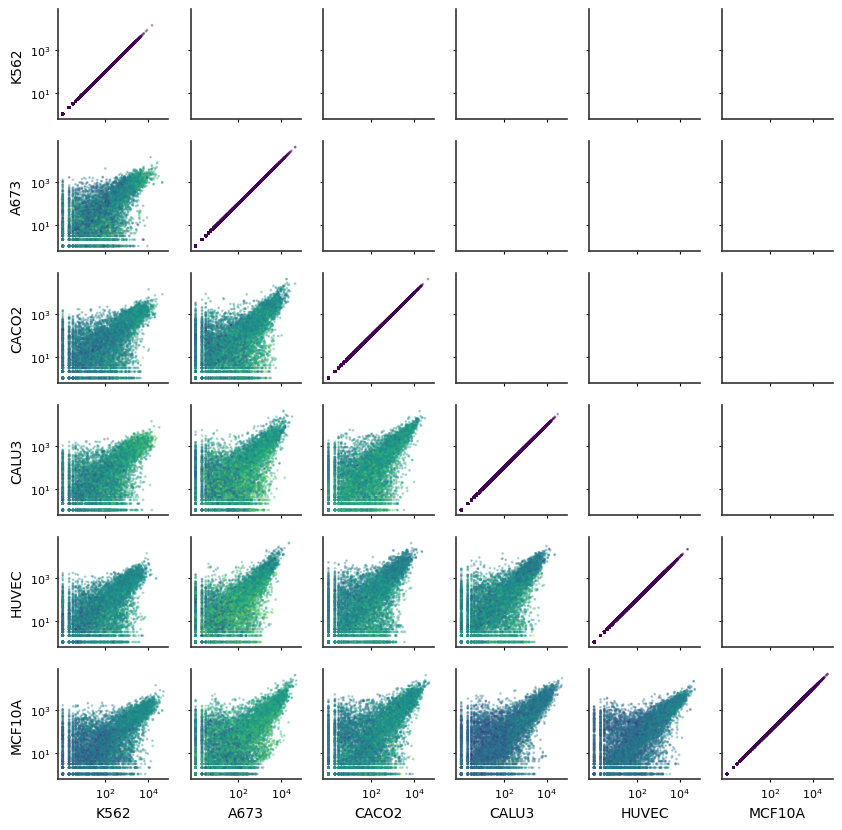

In [24]:
def plot_count_residuals_across_cell_types(all_pred_counts, all_true_counts, cell_types):

    plot_params = {"xtick.labelsize": 8,
                   "ytick.labelsize": 8}
    plt.rcParams.update(plot_params)
    
    
    fig, axes = plt.subplots(len(cell_types), len(cell_types),
                             figsize=(10, 10), sharex=True, sharey=True)
    
    for i, (ax_row, cell_1) in enumerate(zip(axes, cell_types)):
        pred_counts1 = all_pred_counts[cell_1]
        true_counts1 = all_true_counts[cell_1].sum(axis=-1)  # not stranded
        for j, (ax, cell_2) in enumerate(zip(ax_row, cell_types)):
            pred_counts2 = all_pred_counts[cell_2]
            true_counts2 = all_true_counts[cell_2].sum(axis=-1)  # not stranded

            pred_counts1 = pred_counts1.squeeze().flatten()
            pred_counts2 = pred_counts2.squeeze().flatten()
            
            true_counts1 = true_counts1.squeeze().flatten()
            true_counts2 = true_counts2.squeeze().flatten()

            assert pred_counts1.shape == pred_counts2.shape, (pred_counts1.shape, pred_counts2.shape)
            assert true_counts1.shape == true_counts2.shape, (true_counts1.shape, true_counts2.shape)

            if i >= j:
                ax.scatter(true_counts1,
                           true_counts2,
                           #c = np.abs(np.log1p(true_counts2) - pred_counts2),
                           c = pred_counts1 - pred_counts2,
                           alpha = 0.3, s = 1)#, color="blue")
            #else:
                #ax.scatter(true_counts1,
                #           true_counts2,
                #           c = np.abs(np.log1p(true_counts1) - pred_counts1),
                #           alpha = 0.3, s = 1)#, color="blue")

            ax.semilogy()
            ax.semilogx()

            if cell_1 == cell_types[-1]:
                ax.set_xlabel(cell_2, fontsize=10)

            ax.spines["left"].set_linewidth(1.2)
            ax.spines["bottom"].set_linewidth(1.2)
            ax.spines["left"].set_color("#333333")
            ax.spines["bottom"].set_color("#333333")
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)

            ax.tick_params("y", length=2)
            ax.tick_params("x", length=2)
            ax.set_xticks([10**2, 10**4])

            if cell_2 == cell_types[0]:
                ax.set_ylabel(cell_1, fontsize=10)
        
    plt.show()
    

plot_count_residuals_across_cell_types(union_pred_logcounts, union_true_counts, cell_types)

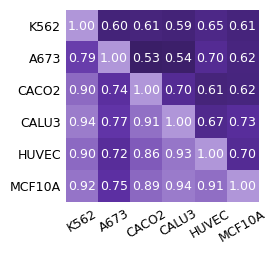

In [25]:
def plot_counts_heatmap_across_cell_types(all_pred_counts, all_true_counts, cell_types):

    plot_params = {"xtick.labelsize": 9,
                   "ytick.labelsize": 9}
    plt.rcParams.update(plot_params)
    
    #fig, axes = plt.subplots(len(cell_types), len(cell_types),
    #                         figsize=(8, 8), sharex=True, sharey=True)
    
    pearson_rs = np.full((len(cell_types), len(cell_types)), np.nan)
    
    for i, cell_1 in enumerate(cell_types):
        pred_counts1 = all_pred_counts[cell_1]
        true_counts1 = all_true_counts[cell_1].sum(axis=-1)
        for j, cell_2 in enumerate(cell_types):
            pred_counts2 = all_pred_counts[cell_2]
            true_counts2 = all_true_counts[cell_2].sum(axis=-1)

            pred_counts1 = pred_counts1.squeeze().flatten()
            pred_counts2 = pred_counts2.squeeze().flatten()
            true_counts1 = true_counts1.squeeze().flatten()
            true_counts2 = true_counts2.squeeze().flatten()
            
            assert pred_counts1.shape == pred_counts2.shape, (pred_counts1.shape, pred_counts2.shape)
            assert true_counts1.shape == true_counts2.shape, (true_counts1.shape, true_counts2.shape)
            
            if i >= j:
                pearson_rs[i,j] = np.corrcoef(pred_counts1, pred_counts2)[0,1]
            else:
                pearson_rs[i,j] = np.corrcoef(np.log1p(true_counts1), np.log1p(true_counts2))[0,1]
    
    plt.figure(figsize=(2.5,2.5))
    cmap = get_continuous_cmap(["#3B1F68", "#5F31A6", "#B197DA"])
    plt.imshow(pearson_rs, cmap=cmap)
    
    ax = plt.gca()
    
    for i in range(len(cell_types)):
        for j in range(len(cell_types)):
            pearson_r = pearson_rs[i, j]
            pearson_str = "%0.2f" % (pearson_r)# if pearson_r < 0.9999 else "1"
            text = ax.text(j, i, pearson_str,
                           ha="center", va="center", color="w", fontsize=9)
    
    
    
    for side in ["top", "right", "bottom", "left"]:
        ax.spines[side].set_visible(False)
    
    ax.tick_params(length=0)

    ax.set_xticks(range(len(cell_types)), cell_types, rotation=30)
    ax.set_yticks(range(len(cell_types)), cell_types)
    
    plt.show()
    
plot_counts_heatmap_across_cell_types(union_pred_logcounts, union_true_counts, cell_types)

In [25]:
from motif_hits_utils import load_motif_hits

def load_motif_hits_all_cells(cell_types, timestamps, model_type, data_type,
                              task = "profile", fdr = 0.05):
    motif_hits = dict()
    peak_hits = dict()
    peak_hit_counts = dict()
    
    for cell_type in cell_types:
        hits, hits_in_peaks, hits_in_peaks_counts = load_motif_hits(cell_type,
                                                                    timestamps[cell_type],
                                                                    model_type, data_type,
                                                                    task=task, fdr=fdr)
        motif_hits[cell_type] = hits
        peak_hits[cell_type] = hits_in_peaks
        peak_hit_counts[cell_type] = hits_in_peaks_counts
        
    return motif_hits, peak_hits, peak_hit_counts

motif_hits_dfs, peak_hits, peak_hit_counts = load_motif_hits_all_cells(["K562"],
                                                                       timestamps,
                                                                       model_type,
                                                                       data_type)

Timestamp: 2022-10-05_03-39-32
Timestamp: 2022-10-05_03-39-32


In [26]:
# This is specific to K562

motif_keys_to_labels = ["BRE/SP", "CA-Inr", "GABPA/ELK4", "NFY", "NRF1", "ATF1",
                        "YY1", "TA-Inr", "TATA", "THAP11",
                        "AP1",  "CTCF", "ZBTB33"]

In [27]:
def get_filter_for_peaks_with_motif(peak_hit_counts, motif_key_labels, motifs_to_find):
    motif_bools = dict()
    for motif in motifs_to_find:
        assert motif in motif_key_labels, (motif, motif_key_labels)
        motif_index = motif_key_labels.index(motif)
        motif_bools[motif] = peak_hit_counts[:, motif_index] > 0

    return motif_bools

motif_filters = get_filter_for_peaks_with_motif(peak_hit_counts["K562"],
                                                motif_keys_to_labels,
                                                ["TATA", "CA-Inr", "TA-Inr"])

In [32]:
from motif_hits_utils import load_coords
import gzip
#from load_annotations_utils import load_coords_with_summits

def load_coords_with_summits(peak_bed, in_window):
    if peak_bed.endswith(".gz"):
        with gzip.open(peak_bed) as f:
            lines = [line.decode().split() for line in f]
    else:
        with open(peak_bed) as f:
            lines = [line.split() for line in f]

    coords = []
    for line in lines:
        chrom, peak_start, peak_end = line[0], int(line[1]), int(line[2])
        mid = (peak_start + peak_end) // 2
        window_start = mid - in_window // 2
        window_end = mid + in_window // 2
        
        if line[-2] == ".":
            summit_pos = None
        else:
            summit_pos = int(line[-2])

        if line[-1] == ".":
            summit_neg = None
        else:
            summit_neg = int(line[-1])
        
        coords.append((chrom, window_start, window_end, summit_pos, summit_neg))
    return coords

def load_coords_all_cells(cell_types, timestamps, model_type, data_type):
    coords = dict()
    for cell_type in cell_types:
        config = ValFilesConfig(cell_type, model_type, timestamps[cell_type], data_type)
        coords[cell_type] = load_coords_with_summits(config.val_peak_path,
                                        config.in_window)
    return coords

coords = load_coords_all_cells(cell_types, timestamps, model_type, data_type)

Timestamp: 2022-10-05_03-39-32
Timestamp: 2022-11-01_05-16-07
Timestamp: 2022-11-01_19-09-32
Timestamp: 2022-11-01_19-09-51
Timestamp: 2022-11-01_05-16-51
Timestamp: 2022-11-01_05-04-08


In [33]:
from load_annotations_utils import get_annotations_for_peaks, get_ccre_bed

def load_ccre_annots_all_cells(cell_types, all_coords, in_window=2114, out_window=1000):
    ccre_annots = dict()
    for cell_type in cell_types:
        coords = all_coords[cell_type]
        ccre_bed = get_ccre_bed(cell_type)
        ccre_annots[cell_type] = get_annotations_for_peaks(coords, ccre_bed,
                                                           in_window, out_window) 
    return ccre_annots

ccre_annots = load_ccre_annots_all_cells(["K562"], coords)

In [34]:
def jitter_dots(dots, jitter_by=0.25):
    offsets = dots.get_offsets()
    jittered_offsets = offsets
    # only jitter in the x-direction
    jittered_offsets[:, 0] += np.random.uniform(-jitter_by,
                                                jitter_by,
                                                offsets.shape[0])
    dots.set_offsets(jittered_offsets)

In [80]:
#from load_annotations_utils import get_annotations_for_hk_genes
# uncomment this

housekeeping_genes_bed = get_proj_dir() + "/annotations/housekeeping_only.bed.gz"

hk_annots = get_annotations_for_hk_genes(coords["K562"], housekeeping_genes_bed)

In [43]:
from load_annotations_utils import *

gene_regions_files = {"genes" : get_proj_dir() + "/annotations/gene_regions.bed",
                      "intergenic" : get_proj_dir() + "/annotations/intergenic_regions.bed",
                      "exons" : get_proj_dir() + "/annotations/exons.bed",
                      "introns" : get_proj_dir() + "/annotations/introns.bed",
                      "utrs" : get_proj_dir() + "/annotations/utrs.bed"}


def load_annotations_no_label(bed_filepath):
    if bed_filepath.endswith(".gz"):
        with gzip.open(bed_filepath) as f:
            lines = [line.decode().split() for line in f]
    else:
        with open(bed_filepath) as f:
            lines = [line.split() for line in f]

    coords = []
    for line in lines:
        chrom, start, end = line[0], int(line[1]), int(line[2])
        coords.append((chrom, start, end))
    return coords


def adjust_coords_summits(coord):
    if coord[-2] is None:
        return coord[-1]
    if coord[-1] is None:
        return coord[-2]
    return (coord[-1] + coord[-2]) // 2

def get_annotations_for_gene_regions(coords, gene_regions_files, in_window=2114, out_window=1000):
    overlap_annots = dict()
    
    for region_name, region_filepath in gene_regions_files.items():
        annots = load_annotations_no_label(region_filepath)

        # get set of chromosomes included in peak set
        chroms = sorted(list(set(coord[0] for coord in coords)))

        # make dict of chromosome --> sorted list of annotation regions
        annots_by_chrom = {chrom : sorted([a[1:] for a in annots if a[0] == chrom]) for chrom in chroms}

        # adjust the starts and ends of peak coordinates so they only cover +/- 1 bp
        # (otherwise we'd probably get a lot of FP annotation overlaps)
        coords_adjust = [(c[0], adjust_coords_summits(c) - 1, adjust_coords_summits(c)) for c in coords]

        # get bool for peak overlap, for each peak
        overlap_bools = np.array([get_overlap_hks(coord[1:], annots_by_chrom[coord[0]]) for coord in coords_adjust])
        
        overlap_annots[region_name] = overlap_bools
        
    return overlap_annots

gene_region_annots = get_annotations_for_gene_regions(coords["K562"], gene_regions_files)

In [44]:
[(k, sum(t)) for k, t in gene_region_annots.items()]

[('genes', 2564),
 ('intergenic', 1270),
 ('exons', 1048),
 ('introns', 1516),
 ('utrs', 566)]

In [45]:
def load_annotations_with_strand(annot_bed):
    if annot_bed.endswith(".gz"):
        with gzip.open(annot_bed) as f:
            lines = [line.decode().split() for line in f]
    else:
        with open(annot_bed) as f:
            lines = [line.split() for line in f]

    coords = []
    for line in lines:
        chrom, start, end, strand = line[0], int(line[1]), int(line[2]), line[3]
        coords.append((chrom, start, end, strand))
    return coords


def get_TSS_dist_if_overlap(list_a, list_b):
    # This function is similar to bedtools intersect,
    # but returns the bed file's labels, if windows overlap, for each
    # window in list_a.
    
    # Assumes everything's on the same chromosome
    # Assumes list_a is list of (start, stop), list_b is (start, stop, label)
    
    # output is list with len == len(list_a)
    matches = []
    
    for a_item in list_a:
        a_TSS_dists = []
        a_start, a_end = a_item
        b_index = 0
        while b_index < len(list_b):
            b_start, b_end, strand = list_b[b_index]
            
            # b is after a
            if b_start >= a_end:
                break
            # b is before a
            if b_end <= a_start:
                b_index += 1
                continue
            
            # only other case left: b overlaps a
            if strand == "+":
                # will be > 0 if a inside b
                a_TSS_dists.append(a_start - b_start)
            else:
                assert strand == "-", strand
                # will be > 0 if a inside b
                a_TSS_dists.append(b_end - a_end)
            
            b_index += 1

        if len(a_TSS_dists) > 0:
            matches.append(min(a_TSS_dists))
        else:
            matches.append(None)
    assert len(matches) == len(list_a), matches
    return matches


def get_dist_to_TSS(coords, genes_bed, in_window=2114, out_window=1000):
    annots = load_annotations_with_strand(genes_bed)

    # get set of chromosomes included in peak set
    chroms = sorted(list(set(coord[0] for coord in coords)))

    # make dict of chromosome --> sorted list of annotation regions
    annots_by_chrom = {chrom : sorted([a[1:] for a in annots if a[0] == chrom]) for chrom in chroms}

    # adjust the starts and ends of peak coordinates so they only cover +/- 1 bp
    # (otherwise we'd probably get a lot of FP annotation overlaps)
    coords_adjust = [(c[0], adjust_coords_summits(c) - 1, adjust_coords_summits(c)) for c in coords]

    # get dist to TSS for peak, if peak is inside a gene, for each peak
    TSS_dists = []
    for coord in coords_adjust:
        TSS_dists.append(get_TSS_dist_if_overlap((coord[1:],), annots_by_chrom[coord[0]])[0])

    return np.array(TSS_dists)


TSS_dists = get_dist_to_TSS(coords["K562"], gene_regions_files["genes"])

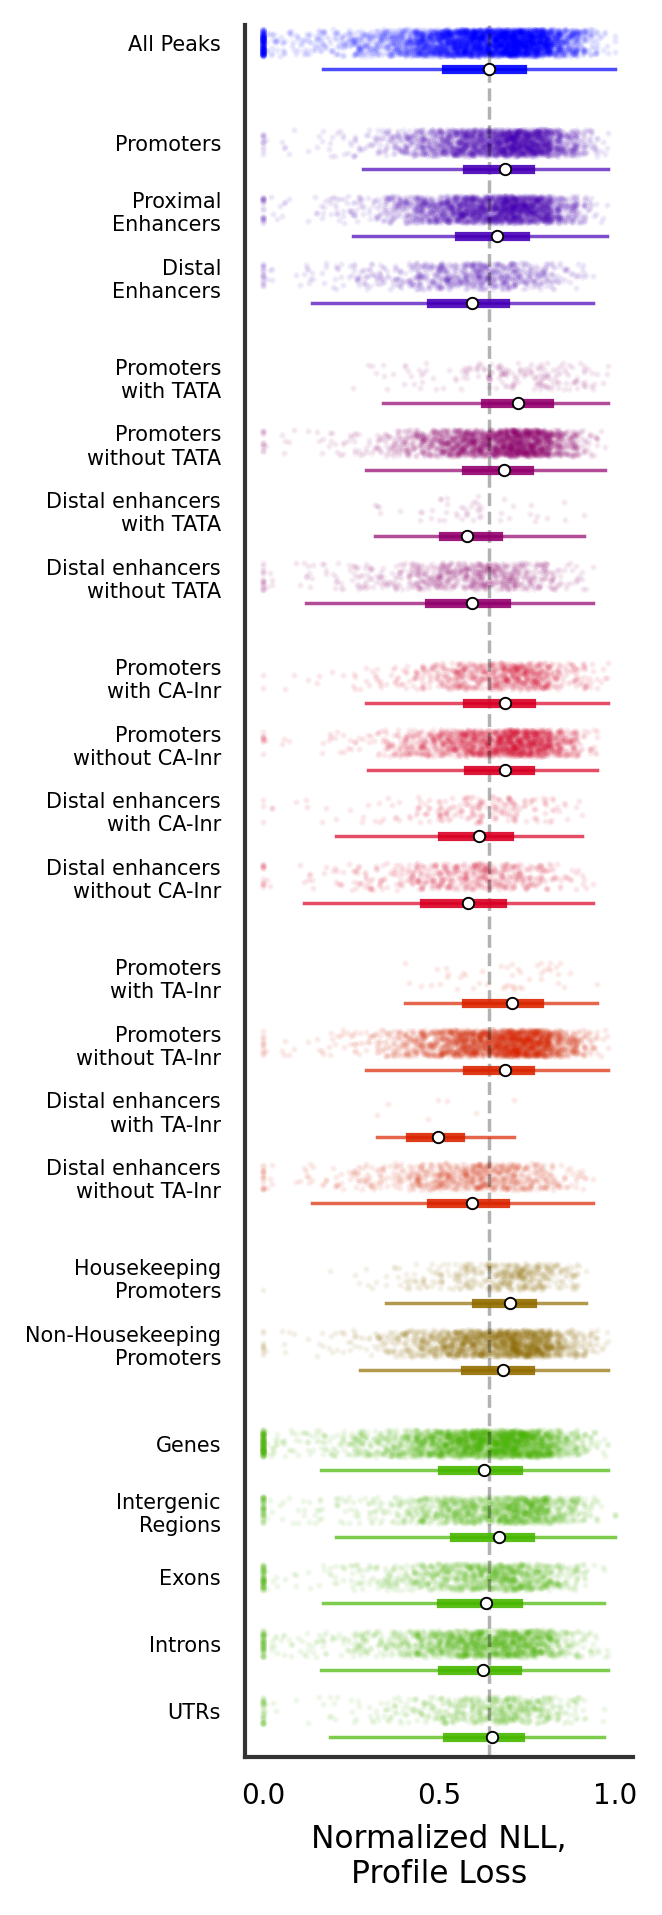

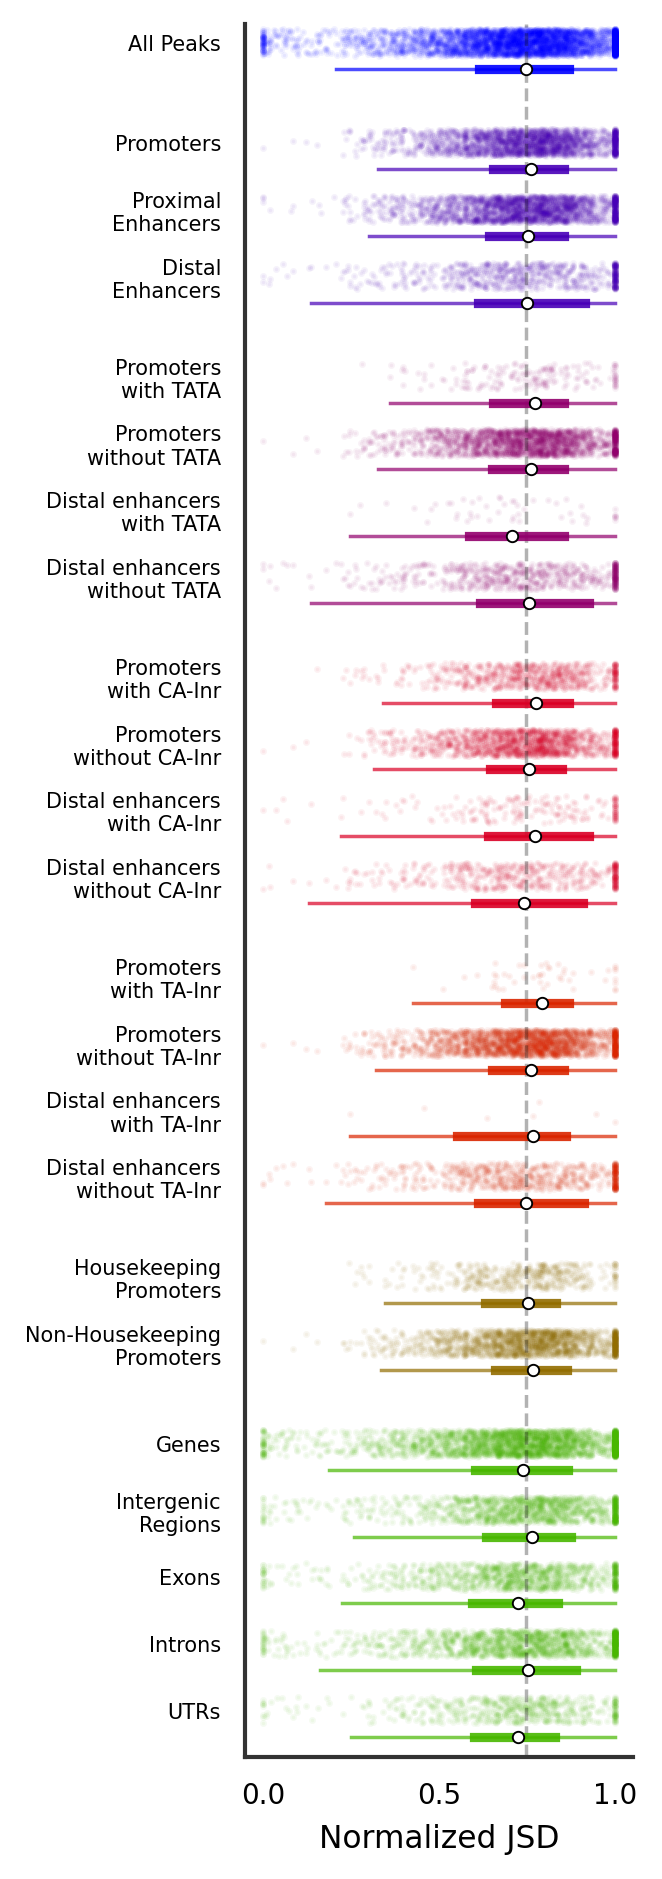

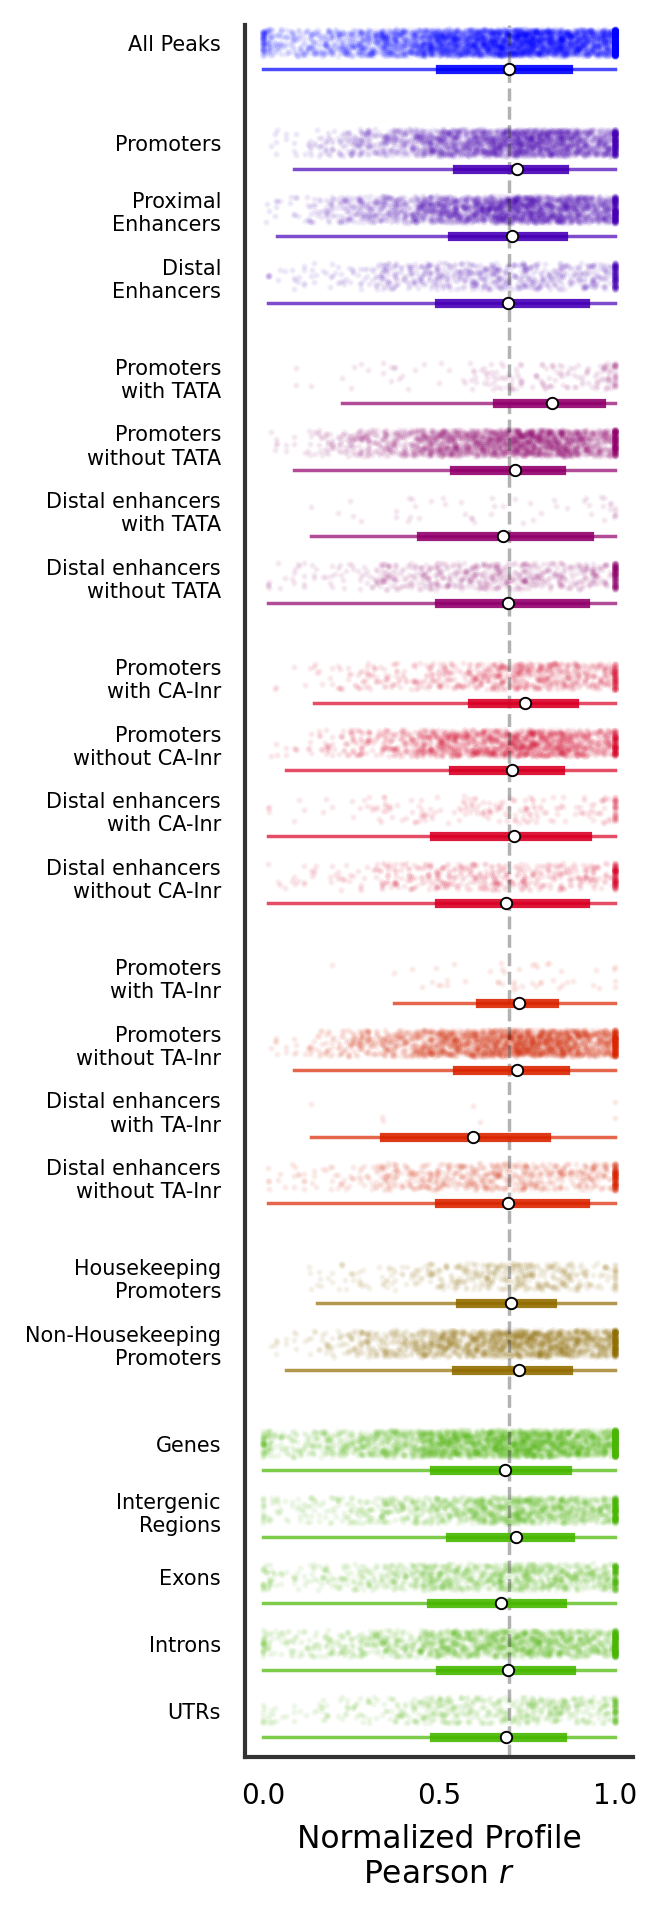

In [83]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib.cbook import boxplot_stats

def jitter_dots_y(dots, jitter_by=0.2):
    offsets = dots.get_offsets()
    jittered_offsets = offsets
    jittered_offsets[:, 1] += np.random.uniform(-jitter_by,
                                                jitter_by,
                                                offsets.shape[0])
    dots.set_offsets(jittered_offsets)

def plot_scatter_and_boxplot(data, position, color = "blue", dot_size=1, dot_alpha=0.05,
                             box_linewidth=1.5, box_whisker_linewidth=1):
    
    dots = plt.scatter(data, [position] * len(data),
                       color = color, s = dot_size, alpha=dot_alpha)
    jitter_dots_y(dots)
    
    bps = boxplot_stats(data)[0]
    
    plt.plot([bps["whislo"], bps["whishi"]], [position + 0.4] * 2,
             linewidth=box_whisker_linewidth, color=color, alpha=0.7)
    plt.plot([bps["q1"], bps["q3"]], [position + 0.37] * 2,
             linewidth=box_linewidth, color=color, alpha=0.9)
    plt.plot([bps["q1"], bps["q3"]], [position + 0.43] * 2,
             linewidth=box_linewidth, color=color, alpha=0.9)

    # draw median dot
    plt.scatter(bps["med"], [position + 0.4], s=8, color="k", zorder=30)
    plt.scatter(bps["med"], [position + 0.4], s=3, color="white", zorder=31)
    
    
def plot_stratify(val_metrics, ccre_annots, hk_annots, gene_region_annots,
                  motif_filters, motif_keys_labels, metric = "nll"):
    metric_names = {"nll" : "Normalized NLL,\nProfile Loss",
                    "jsd" : "Normalized JSD",
                    "profile_pearson" : "Normalized Profile\n" + r'Pearson $r$'}
    
    annots_to_labels = {"PLS" : "Promoters",
                        "pELS" : "Proximal\nEnhancers",
                        "dELS" : "Distal\nEnhancers"}
    
    regions_to_labels = {"genes" : "Genes",
                        "exons" : "Exons",
                        "intergenic" : "Intergenic\nRegions",
                        "utrs" : "UTRs",
                        "introns" : "Introns"}

    annots_to_labels_hk =  {"hk" : "Housekeeping\nPromoters",
                             "not-hk" : "Non-Housekeeping\nPromoters"}


    metrics = val_metrics[metric].squeeze()
    
    x_labels = []
    
    plt.figure(figsize=(2, 9), dpi=250)

    plt.axvline(np.median(metrics), linestyle="dashed", alpha=0.3, color="k", linewidth=1)
    
    num_groups = 7
    groupings = [0] + [1]*len(annots_to_labels)
    for i in range(len(motif_filters)):
        groupings += [i + 2] * 4
    groupings += [len(motif_filters) + 2] * len(annots_to_labels_hk)
    groupings += [len(motif_filters) + 3] * len(regions_to_labels)
    assert max(groupings) == num_groups - 1, (num_groups, groupings)
    
    cNorm  = colors.Normalize(vmin=0, vmax=num_groups)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=plt.get_cmap('brg'))
    
    x_index = 0
    x_labels.append("All Peaks")
    plot_scatter_and_boxplot(metrics, x_index)
    x_index += 1
    x_offset = 0.5
    xticks = [0]
    
    for annot_name in annots_to_labels.keys():
        x_labels.append(annots_to_labels[annot_name])
        xticks.append(x_index + x_offset)
        metrics_subset = metrics[ccre_annots[annot_name]]
        plot_scatter_and_boxplot(metrics_subset, x_index + x_offset,
                                 color = scalarMap.to_rgba(groupings[x_index]))
        x_index += 1
    
    x_offset += 0.5
    
    for motif in motif_filters.keys():
        x_labels.append("Promoters\nwith " + motif)
        xticks.append(x_index + x_offset)
        metrics_subset = metrics[ccre_annots["PLS"] * motif_filters[motif]]
        plot_scatter_and_boxplot(metrics_subset, x_index + x_offset,
                                 color = scalarMap.to_rgba(groupings[x_index]))
        x_index += 1
        
        x_labels.append("Promoters\nwithout " + motif)
        xticks.append(x_index + x_offset)
        metrics_subset = metrics[ccre_annots["PLS"] * (~ motif_filters[motif])]
        plot_scatter_and_boxplot(metrics_subset, x_index + x_offset,
                                 color = scalarMap.to_rgba(groupings[x_index]))
        x_index += 1
        
        
        x_labels.append("Distal enhancers\nwith " + motif)
        xticks.append(x_index + x_offset)
        metrics_subset = metrics[ccre_annots["dELS"] * motif_filters[motif]]
        plot_scatter_and_boxplot(metrics_subset, x_index + x_offset,
                                 color = scalarMap.to_rgba(groupings[x_index]))
        x_index += 1
        
        x_labels.append("Distal enhancers\nwithout " + motif)
        xticks.append(x_index + x_offset)
        metrics_subset = metrics[ccre_annots["dELS"] * (~ motif_filters[motif])]
        plot_scatter_and_boxplot(metrics_subset, x_index + x_offset,
                                 color = scalarMap.to_rgba(groupings[x_index]))
        x_index += 1
        
        x_offset += 0.5

    
    for annot_name in annots_to_labels_hk.keys():
        x_labels.append(annots_to_labels_hk[annot_name])
        xticks.append(x_index + x_offset)
        
        if annot_name == "hk":
            metrics_subset = metrics[ccre_annots["PLS"] * hk_annots]
        else:
            metrics_subset = metrics[ccre_annots["PLS"] * (~ hk_annots)]

        plot_scatter_and_boxplot(metrics_subset, x_index + x_offset,
                                 color = scalarMap.to_rgba(groupings[x_index]))
        x_index += 1
        
    x_offset += 0.5
        
    for region_name in gene_region_annots.keys():
        x_labels.append(regions_to_labels[region_name])
        xticks.append(x_index + x_offset)
        
        metrics_subset = metrics[gene_region_annots[region_name]]
        plot_scatter_and_boxplot(metrics_subset, x_index + x_offset,
                                 color = scalarMap.to_rgba(groupings[x_index]))
        x_index += 1
        
    ax = plt.gca()
    ax.spines["left"].set_linewidth(1.2)
    ax.spines["bottom"].set_linewidth(1.2)
    ax.spines["left"].set_color("#333333")
    ax.spines["bottom"].set_color("#333333")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none')

    plt.xticks(fontsize=8)
    plt.xlabel(metric_names[metric], fontsize=9)

    plt.yticks(xticks, x_labels, fontsize = 6)
    plt.ylim(plt.gca().get_ylim()[1] - 1, plt.gca().get_ylim()[0] + 1)
    
    plt.show()
    
plot_stratify(norm_val_metrics["K562"], ccre_annots["K562"], hk_annots, gene_region_annots, motif_filters, motif_keys_to_labels)
plot_stratify(norm_val_metrics["K562"], ccre_annots["K562"], hk_annots, gene_region_annots, motif_filters, motif_keys_to_labels, metric="jsd")
plot_stratify(norm_val_metrics["K562"], ccre_annots["K562"], hk_annots, gene_region_annots, motif_filters, motif_keys_to_labels, metric="profile_pearson")


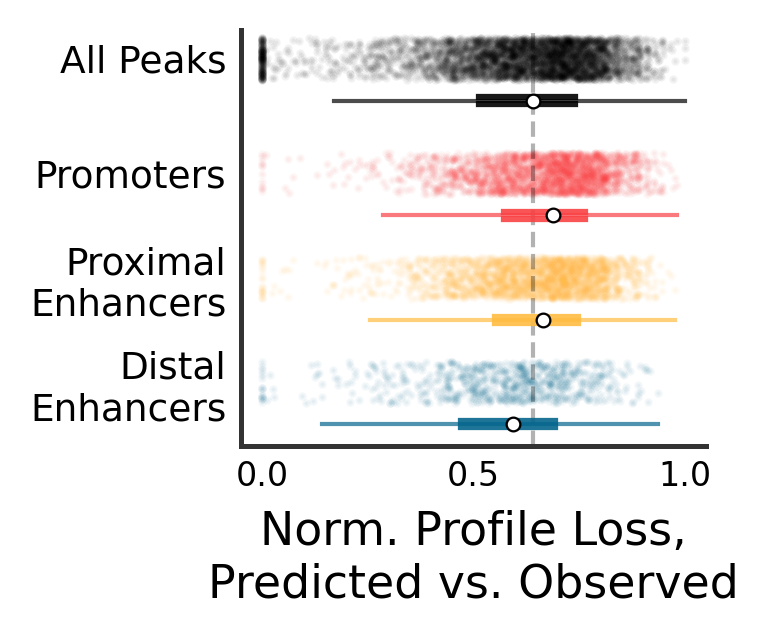

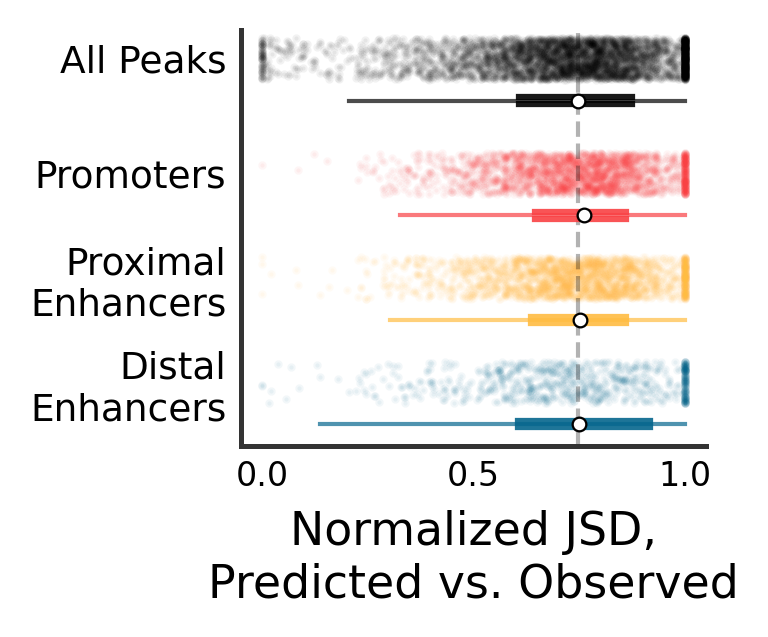

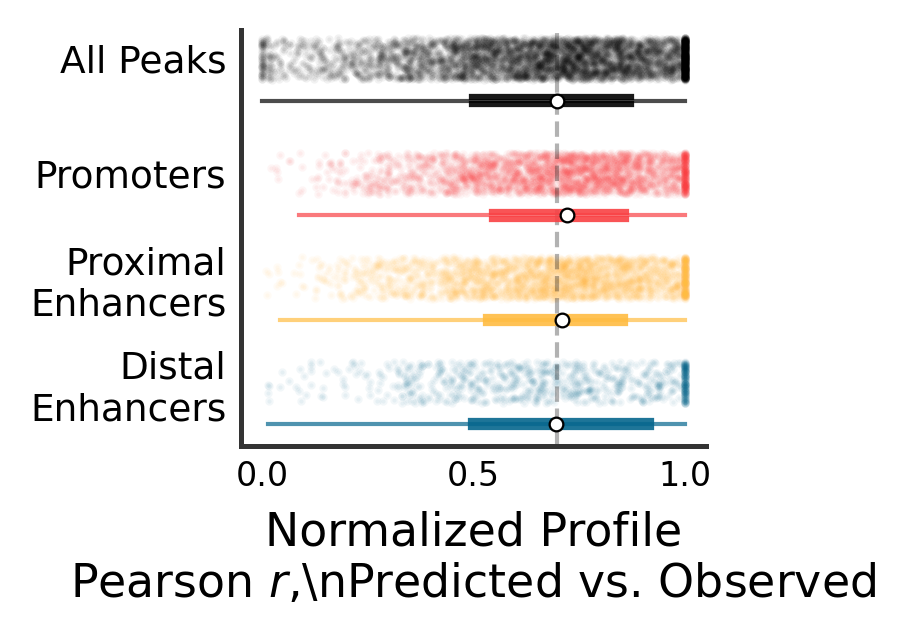

In [120]:
def plot_stratify_but_subset(val_metrics, ccre_annots, metric = "nll"):
    metric_names = {"nll" : "Norm. Profile Loss,\nPredicted vs. Observed",
                    "jsd" : "Normalized JSD,\nPredicted vs. Observed",
                    "profile_pearson" : "Normalized Profile\n" + r'Pearson $r$,\nPredicted vs. Observed'}
    
    annots_to_labels = {"PLS" : "Promoters",
                        "pELS" : "Proximal\nEnhancers",
                        "dELS" : "Distal\nEnhancers"}
    
    annots_to_colors = {"PLS" : "#f94144",
                        "pELS" : "#ffbc42",
                        "dELS" : "#05668d"}


    metrics = val_metrics[metric].squeeze()
    
    x_labels = []
    
    plt.figure(figsize=(2, 1.8), dpi=300)

    plt.axvline(np.median(metrics), linestyle="dashed", alpha=0.3, color="k", linewidth=1)
    
    num_groups = 2
    groupings = [0] + [1]*len(annots_to_labels)
    assert max(groupings) == num_groups - 1, (num_groups, groupings)
    
    cNorm  = colors.Normalize(vmin=0, vmax=num_groups)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=plt.get_cmap('brg'))
    
    x_index = 0
    x_labels.append("All Peaks")
    plot_scatter_and_boxplot(metrics, x_index, color="k")
    x_index += 1
    x_offset = 0.1
    xticks = [0]
    
    for annot_name in annots_to_labels.keys():
        x_labels.append(annots_to_labels[annot_name])
        xticks.append(x_index + x_offset)
        metrics_subset = metrics[ccre_annots[annot_name]]
        plot_scatter_and_boxplot(metrics_subset, x_index + x_offset,
                                 color = annots_to_colors[annot_name])
        x_index += 1

        
    ax = plt.gca()
    ax.spines["left"].set_linewidth(1.2)
    ax.spines["bottom"].set_linewidth(1.2)
    ax.spines["left"].set_color("#333333")
    ax.spines["bottom"].set_color("#333333")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none')

    ax.tick_params(length=0)
    plt.xticks(fontsize=8,)
    plt.xlabel(metric_names[metric], fontsize=11)

    plt.yticks(xticks, x_labels, fontsize = 9)
    plt.ylim(plt.gca().get_ylim()[1], plt.gca().get_ylim()[0] - 0.1)
    
    plt.show()
    
plot_stratify_but_subset(norm_val_metrics["K562"], ccre_annots["K562"])
plot_stratify_but_subset(norm_val_metrics["K562"], ccre_annots["K562"], metric="jsd")
plot_stratify_but_subset(norm_val_metrics["K562"], ccre_annots["K562"], metric="profile_pearson")


In [ ]:
### coords["K562"]

weird_site_indexes = (norm_val_metrics["K562"]["nll"] == 0).squeeze()

In [47]:
np.array(coords["K562"])[weird_site_indexes]

array([['chr20', 49279245, 49281359, 49280323, 49280251],
       ['chr19', 50795152, 50797266, 50796312, 50796120],
       ['chr18', 36021613, 36023727, None, 36022672],
       ['chr18', 11812622, 11814736, 11813676, None],
       ['chr19', 1989652, 1991766, 1990763, 1990652],
       ['chr20', 63701158, 63703272, None, 63702219],
       ['chr19', 8323918, 8326032, 8324978, None],
       ['chr19', 49489863, 49491977, 49490906, None],
       ['chr19', 8323369, 8325483, 8324429, None],
       ['chr18', 3652674, 3654788, 3653860, 3653599],
       ['chr19', 49490036, 49492150, 49491175, 49490989],
       ['chr19', 38225381, 38227495, 38226443, 38226433],
       ['chr19', 50794939, 50797053, None, 50795993],
       ['chr19', 41872539, 41874653, 41873601, None],
       ['chr19', 18592575, 18594689, 18593656, 18593607],
       ['chr19', 4359965, 4362079, 4361157, 4360888],
       ['chr19', 1726518, 1728632, None, 1727579],
       ['chr19', 868382, 870496, 869496, 869383],
       ['chr19', 1256

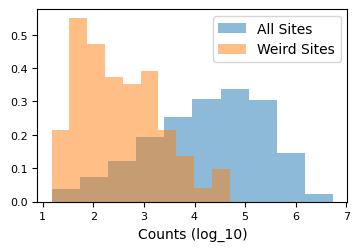

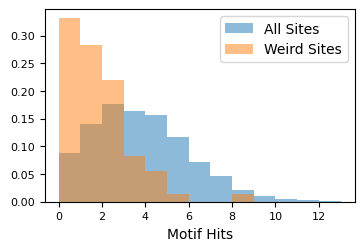

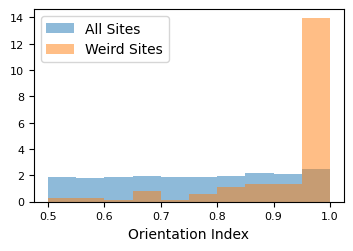

genes	0.669	0.703
intergenic	0.331	0.297
exons	0.273	0.379
introns	0.395	0.324
utrs	0.148	0.193


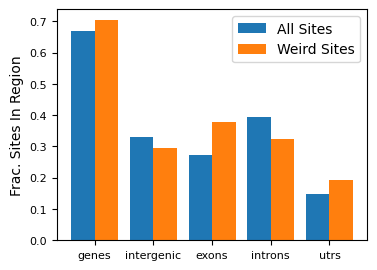

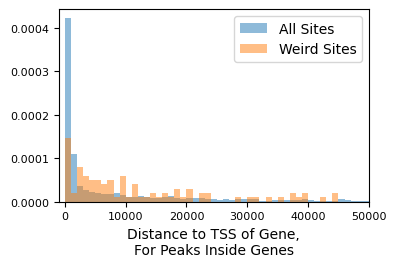

In [49]:
def make_plots_for_weird_sites(weird_site_indexes, true_profs, true_counts,
                               peak_hit_counts, gene_region_annots, TSS_dists):
    plt.figure(figsize=(4,2.5))
    plt.hist(np.log10(true_counts["K562"] + 1).sum(axis=1),
             alpha=0.5, density=True, label="All Sites")
    plt.hist(np.log10(true_counts["K562"][weird_site_indexes] + 1).sum(axis=1),
             alpha=0.5, density=True, label="Weird Sites")
    plt.legend()
    plt.xlabel("Counts (log_10)")
    plt.show()

    
    plt.figure(figsize=(4,2.5))
    plt.hist(peak_hit_counts["K562"].sum(axis=1),
             alpha=0.5, density=True, bins=range(14), label="All Sites")
    plt.hist(peak_hit_counts["K562"].sum(axis=1)[weird_site_indexes],
             alpha=0.5, density=True, bins=range(14), label="Weird Sites")
    plt.legend()
    plt.xlabel("Motif Hits")
    plt.show()
    
    
    ois = get_orientation_indexes(true_profs["K562"])

    plt.figure(figsize=(4,2.5))
    plt.hist(ois,
             alpha=0.5, density=True, label="All Sites")
    plt.hist(ois[weird_site_indexes],
             alpha=0.5, density=True, label="Weird Sites")
    plt.legend()
    plt.xlabel("Orientation Index")
    plt.show()
    
    
    plt.figure(figsize=(4,3))

    fracs_overall = []
    fracs_in_region = []
    for region_name, region_bools in gene_region_annots.items():
        frac_overall = sum(region_bools) / len(region_bools)
        frac_in_region = sum(region_bools[weird_site_indexes]) / len(region_bools[weird_site_indexes])
        print(region_name + "\t%0.3f\t%0.3f" %(frac_overall, frac_in_region))

        fracs_overall.append(frac_overall)
        fracs_in_region.append(frac_in_region)

    w = 0.4
    b1 = plt.bar(range(len(fracs_overall)), fracs_overall,
                 width=w, label="All Sites")
    # Same thing, but offset the x.
    b2 = plt.bar(np.array(range(len(fracs_overall))) + w, fracs_in_region,
                 width=w, label="Weird Sites")

    # Fix the x-axes.
    plt.xticks(np.array(range(len(fracs_overall))) + w / 2, labels=gene_region_annots.keys())
    plt.ylabel("Frac. Sites In Region")

    # Add legend.
    plt.legend()

    plt.show()
    
    
    plt.figure(figsize=(4,2.5))
    plt.hist([d for d in TSS_dists if d is not None],
             alpha=0.5, density=True, bins=np.arange(0,1200000, 1000), label="All Sites")
    plt.hist([d for d in TSS_dists[weird_site_indexes] if d is not None],
             alpha=0.5, density=True, bins=np.arange(0,1200000, 1000), label="Weird Sites")
    plt.legend()
    plt.xlabel("Distance to TSS of Gene,\nFor Peaks Inside Genes")
    plt.xlim(-1000, 50000)
    plt.show()
    
    
make_plots_for_weird_sites(weird_site_indexes, true_profs, true_counts,
                               peak_hit_counts, gene_region_annots, TSS_dists)

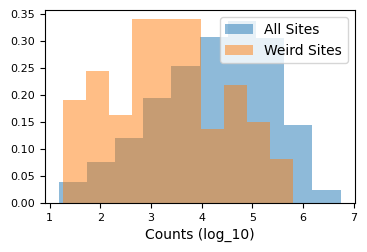

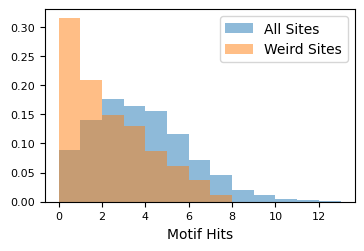

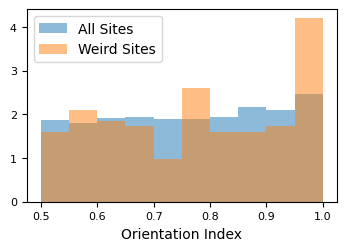

genes	0.669	0.735
intergenic	0.331	0.265
exons	0.273	0.235
introns	0.395	0.500
utrs	0.148	0.099


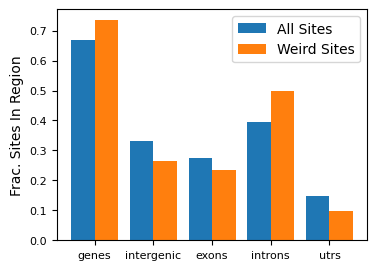

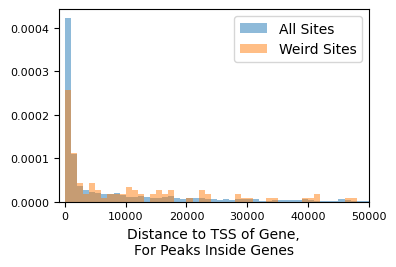

In [50]:
bad_site_indexes = [m > 0.05 and m < 0.3 for m in norm_val_metrics["K562"]["nll"].squeeze()]

make_plots_for_weird_sites(bad_site_indexes, true_profs, true_counts,
                               peak_hit_counts, gene_region_annots, TSS_dists)

In [ ]:
def load_mappability_for_peaks(cell_type, model_type, timestamps[cell_type], data_type):
    config = ValFilesConfig(cell_type, model_type, timestamps[cell_type], data_type)
    print(config)
            _, true_profiles = extract_peaks(config.genome_path,
                                             config.chrom_sizes,
                                             config.plus_bw_path,
                                             config.minus_bw_path,
                                             config.val_peak_path,
                                             in_window=config.in_window,
                                             out_window=config.out_window,
                                             max_jitter=0, verbose=True)
        
load_mappability_for_peaks(cell_type, model_type, timestamps[cell_type], data_type):